In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


currency_df = pd.read_csv(f"C:\\Users\\danil\\Downloads\\currency.csv",sep=";")
items_df = pd.read_csv(f"C:\\Users\\danil\\Downloads\\items.csv",sep=";")
leagues_df=pd.read_csv(f"C:\\Users\\danil\\Downloads\\Telegram Desktop\\leagues.csv",sep=";")

C:\Users\danil\AppData\Local\Temp\ipykernel_4772\2963889686.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  currency_df = pd.read_csv(f"C:\\Users\\danil\\Downloads\\currency.csv",sep=";")
C:\Users\danil\AppData\Local\Temp\ipykernel_4772\2963889686.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  items_df = pd.read_csv(f"C:\\Users\\danil\\Downloads\\items.csv",sep=";")


In [2]:
items_df

,id,timestamp,item_name,base_type,item_type,level_required,chaos_value,links,details_id,league_id
0,11897866,2025-09-03 00:00:00,Grace of the Goddess,UniqueWeapon,Prophecy Wand,NaN,8589.00,NaN,NaN,2
1,11897867,2025-06-27 00:00:00,The Apostate,UniqueArmour,Cabalist Regalia,NaN,1492.80,NaN,NaN,2
2,11897868,2025-06-28 00:00:00,The Apostate,UniqueArmour,Cabalist Regalia,NaN,1546.60,NaN,NaN,2
3,11897869,2025-06-29 00:00:00,The Apostate,UniqueArmour,Cabalist Regalia,NaN,1658.40,NaN,NaN,2
4,11897870,2025-07-02 00:00:00,The Apostate,UniqueArmour,Cabalist Regalia,NaN,1637.52,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...
1095645,11897861,2025-08-29 00:00:00,Grace of the Goddess,UniqueWeapon,Prophecy Wand,NaN,8692.20,NaN,NaN,2
1095646,11897862,2025-08-30 00:00:00,Grace of the Goddess,UniqueWeapon,Prophecy Wand,NaN,8673.00,NaN,NaN,2
1095647,11897863,2025-08-31 00:00:00,Grace of the Goddess,UniqueWeapon,Prophecy Wand,NaN,8664.00,NaN,NaN,2
1095648,11897864,2025-09-01 00:00:00,Grace of the Goddess,UniqueWeapon,Prophecy Wand,NaN,8609.70,NaN,NaN,2


In [3]:

leagues = items_df['league_id'].unique()

correlation_by_league = {}
items_df_rich=items_df[items_df['chaos_value']>200]
items_df_rich['timestamp'] = pd.to_datetime(items_df_rich['timestamp'], errors='coerce')
for league in leagues:

    league_df = items_df_rich[items_df_rich['league_id'] == league].copy()
    

    league_df['date'] = league_df['timestamp'].dt.date
    

    league_pivot = league_df.pivot_table(index='date', columns='item_name', values='chaos_value')
    

    correlation_matrix = league_pivot.corr(method='pearson')
    correlation_by_league[league] = correlation_matrix

C:\Users\danil\AppData\Local\Temp\ipykernel_4772\2306511393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items_df_rich['timestamp'] = pd.to_datetime(items_df_rich['timestamp'], errors='coerce')


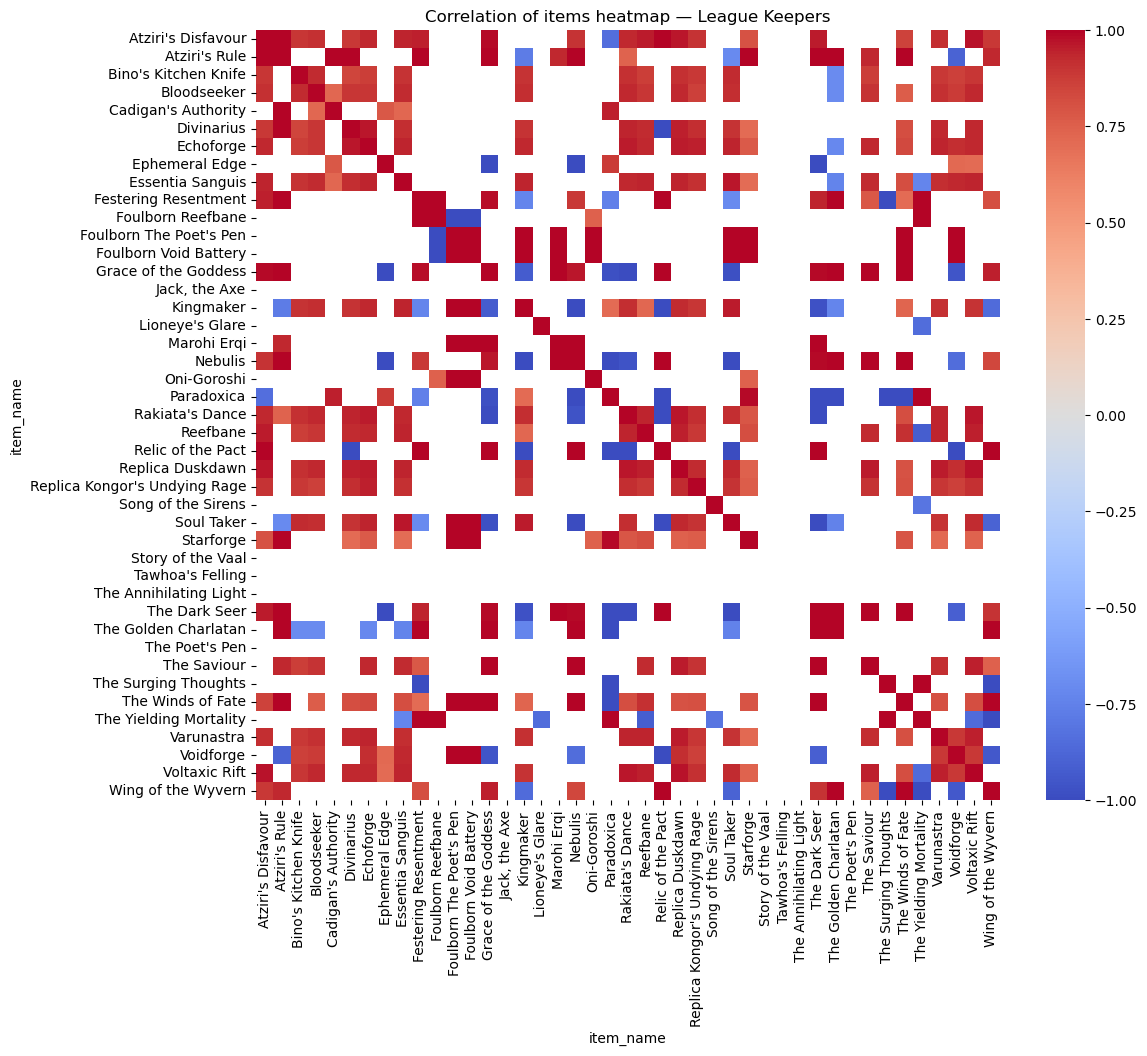

In [4]:
id=1
corr=correlation_by_league[id]
threshold = 0.7


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask = corr.abs() < threshold,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1
)
plt.title(f"Correlation of items heatmap — League {leagues_df.iloc[id-1,1]}")
plt.show()

In [5]:
currency_df['timestamp'] = pd.to_datetime(currency_df['timestamp'], format='mixed', errors='coerce')
currency_df_original = currency_df.copy() # Копия ДО изменений

# --- Шаг 2: Определение диапазона дат для вывода ---
display_start_date = pd.Timestamp('2026-01-05')
display_end_date = pd.Timestamp('2026-01-20')

# Маска для фильтрации Exalted Orb в нужном диапазоне дат для "ДО"
exalted_orb_display_mask_before = (currency_df_original['currency_name'] == 'Exalted Orb') & \
                                 (currency_df_original['timestamp'].dt.normalize() >= display_start_date) & \
                                 (currency_df_original['timestamp'].dt.normalize() <= display_end_date)

print(f"--- Exalted Orb ДО изменений (с {display_start_date.strftime('%Y-%m-%d')} по {display_end_date.strftime('%Y-%m-%d')}) ---")
print(currency_df_original[exalted_orb_display_mask_before][['timestamp', 'chaos_equivalent']].sort_values(by='timestamp').to_string())
print("-" * 80)

# --- Шаг 3: Применение модификаций к основному DataFrame ---

# Определяем границы даты для модификации (с 2026-01-05 по 2026-01-13)
modification_start_date = pd.Timestamp('2026-01-05')
modification_end_date = pd.Timestamp('2026-01-13')

# Маска для строк, которые нужно изменить
date_modification_mask = (currency_df['timestamp'].dt.normalize() >= modification_start_date) & \
                         (currency_df['timestamp'].dt.normalize() <= modification_end_date)

# Валюты, которые НЕ должны быть изменены
currencies_to_exclude = ['Divine Orb', 'Mirror of Kalandra']
currency_exclusion_mask = ~currency_df['currency_name'].isin(currencies_to_exclude)

# Объединяем обе маски для модификации
combined_modification_mask = date_modification_mask & currency_exclusion_mask

# Применяем исправление: берем обратное значение (1 / значение)
currency_df.loc[combined_modification_mask, 'chaos_equivalent'] = \
    1 / currency_df.loc[combined_modification_mask, 'chaos_equivalent']

# --- Шаг 4: Вывод Exalted Orb ПОСЛЕ изменений ---
# Используем тот же диапазон и фильтр, но уже на модифицированном currency_df
exalted_orb_display_mask_after = (currency_df['currency_name'] == 'Exalted Orb') & \
                                (currency_df['timestamp'].dt.normalize() >= display_start_date) & \
                                (currency_df['timestamp'].dt.normalize() <= display_end_date)

print(f"\n--- Exalted Orb ПОСЛЕ изменений (с {display_start_date.strftime('%Y-%m-%d')} по {display_end_date.strftime('%Y-%m-%d')}) ---")
print(currency_df[exalted_orb_display_mask_after][['timestamp', 'chaos_equivalent']].sort_values(by='timestamp').head().to_string())
print("-" * 80)

print("\n--- Проверка: Измененные строки (согласно модификационной маске) ---")
# Также полезно посмотреть только те строки, которые были фактически изменены
print(currency_df[combined_modification_mask][['timestamp', 'currency_name', 'chaos_equivalent']].sort_values(by='timestamp').head().to_string())
print("-" * 80)

--- Exalted Orb ДО изменений (с 2026-01-05 по 2026-01-20) ---
                        timestamp  chaos_equivalent
96     2026-01-05 00:00:00.000000              0.11
95     2026-01-06 00:00:00.000000              0.10
94     2026-01-07 00:00:00.000000              0.10
93     2026-01-08 00:00:00.000000              0.10
92     2026-01-09 00:00:00.000000              0.10
91     2026-01-10 00:00:00.000000              0.10
90     2026-01-11 00:00:00.000000              0.10
89     2026-01-12 00:00:00.000000              0.10
88     2026-01-13 00:00:00.000000              0.10
3314   2026-01-14 23:36:46.479315             10.30
20     2026-01-14 23:59:48.164353             10.30
87     2026-01-15 00:00:00.000000              0.11
620    2026-01-15 17:11:36.756492             10.00
717    2026-01-15 17:43:55.894246             10.00
823    2026-01-15 18:14:27.398442             10.00
959    2026-01-15 18:38:52.974380             10.00
107082 2026-01-15 18:51:53.414392             10.00
15

In [6]:

leagues = currency_df['league_id'].unique()

correlation_by_league = {}
for league in leagues:
    
    league_df = currency_df[currency_df['league_id'] == league].copy()
    
   
    league_df['date'] = currency_df['timestamp'].dt.date
    
   
    league_pivot = league_df.pivot_table(index='date', columns='currency_name', values='chaos_equivalent')
    
 
    correlation_matrix = league_pivot.corr(method='pearson')
    correlation_by_league[league] = correlation_matrix

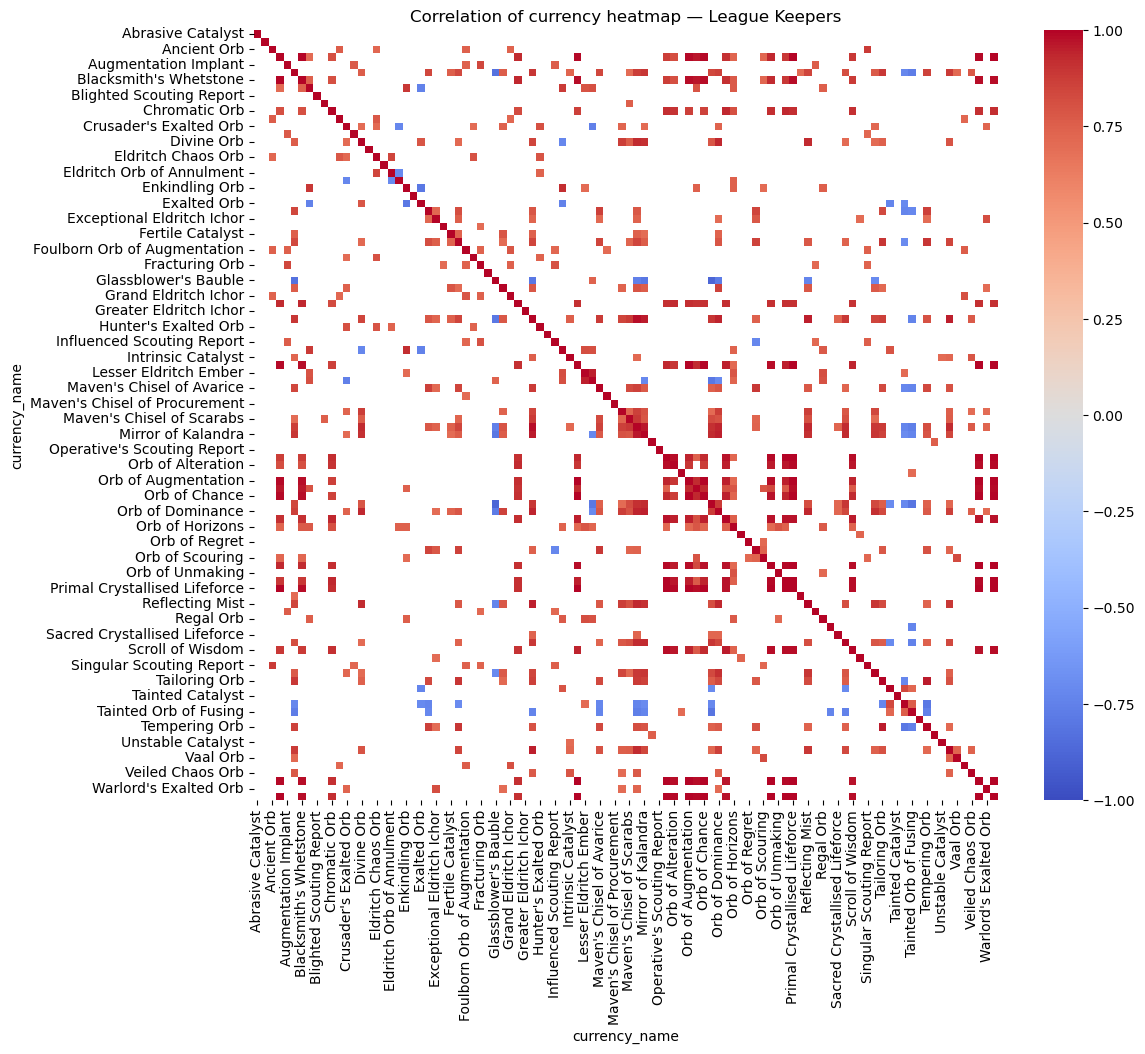

In [7]:
id=1
corr=correlation_by_league[id]
threshold = 0.7


plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask = corr.abs() < threshold,
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1
)
plt.title(f"Correlation of currency heatmap — League {leagues_df.iloc[id-1,1]}")
plt.show()

In [8]:
from scipy import stats
all_divine_prices_log = [] # Будем хранить логарифмированные цены Divine Orb для каждой лиги
league_info_divine = {}

target_currency = 'Divine Orb' # Целевая валюта для анализа

for league in currency_df['league_id'].unique():
    league_data = currency_df[currency_df['league_id'] == league].copy()
    
    # Pivot таблица
    daily = league_data.pivot_table(
        index='timestamp',
        columns='currency_name',
        values='chaos_equivalent',
        aggfunc='mean'
    )
    
    if target_currency in daily.columns:
        # 1. Подготовка данных
        div = daily[target_currency]
        
        # 2. Удаляем нули, отрицательные значения и NaN
        mask = (div > 0) & div.notna()
        div_clean = div[mask]
        
        if len(div_clean) >= 10: # Минимум 10 дней данных для анализа
            # 3. Логарифмическое преобразование (стабилизирует дисперсию и делает распределение более нормальным)
            div_log = np.log(div_clean)
            
            # Сохраняем очищенные и логарифмированные данные для этой лиги
            all_divine_prices_log.append(div_log)
            league_info_divine[league] = {
                'n': len(div_log),
                'mean_log_price': np.mean(div_log),
                'mean_price_original_scale': np.exp(np.mean(div_log)), # Обратное преобразование для интерпретации
                'std_log_price': np.std(div_log)
            }

# Проверка допущений ANOVA
print(f"Проверка допущений ANOVA для {target_currency}:")
print("-" * 40)

# 1. Проверка нормальности (Shapiro-Wilk для каждой группы)
normality_passed = True
# Используем list(league_info_divine.keys())[i] для получения имени лиги по индексу
league_keys = list(league_info_divine.keys())
for i, prices_log in enumerate(all_divine_prices_log):
    if len(prices_log) >= 3 and len(prices_log) <= 5000: # Shapiro-Wilk имеет ограничения по размеру выборки
        stat, p = stats.shapiro(prices_log)
        print(f"Лига {league_keys[i]}: Shapiro p-value = {p:.4f}")
        if p < 0.05:
            normality_passed = False
    else:
        print(f"Лига {league_keys[i]}: Недостаточно данных ({len(prices_log)}) или слишком много данных для Shapiro-Wilk.")
        # Если не можем проверить нормальность, считаем, что допущение не выполнено, чтобы быть консервативными
        normality_passed = False

# 2. Проверка гомогенности дисперсий (Levene's test)
homogeneity_passed = True
if len(all_divine_prices_log) >= 2:
    stat, p = stats.levene(*all_divine_prices_log)
    print(f"\nLevene тест на гомогенность дисперсий: p-value = {p:.4f}")
    homogeneity_passed = p > 0.05
else:
    print("\nНедостаточно лиг для теста Левена.")

# Выбор теста в зависимости от допущений
if len(all_divine_prices_log) >= 2:
    if normality_passed and homogeneity_passed:
        # Параметрический ANOVA
        f_stat, p_value = stats.f_oneway(*all_divine_prices_log)
        test_name = "ANOVA"
    else:
        # Непараметрический тест Крускала-Уоллиса
        h_stat, p_value = stats.kruskal(*all_divine_prices_log)
        f_stat = h_stat # Для единообразия вывода
        test_name = "Kruskal-Wallis"
    
    print(f"\n{test_name} тест: Stat={f_stat:.3f}, p-value={p_value:.4f}")
    
    if p_value < 0.05:
        print(f"\n✓ Есть статистически значимые различия в ценах {target_currency} между лигами")
        
        # Post-hoc анализ (если различия есть)
        if len(all_divine_prices_log) > 2:
            print("\nPost-hoc сравнения (Tukey HSD):")
            # Подготовка данных для post-hoc
            data_for_posthoc = []
            group_labels = []
            
            for idx, prices_log in enumerate(all_divine_prices_log):
                data_for_posthoc.extend(prices_log)
                group_labels.extend([f'League_{league_keys[idx]}'] * len(prices_log))
            
            # Tukey HSD
            from statsmodels.stats.multicomp import pairwise_tukeyhsd
            
            tukey = pairwise_tukeyhsd(
                endog=data_for_posthoc,
                groups=group_labels,
                alpha=0.05
            )
            
            print(tukey)
    else:
        print(f"\n✗ Нет статистически значимых различий в ценах {target_currency} между лигами")
else:
    print("\nНедостаточно данных для проведения сравнения между лигами (менее 2 лиг).")



Проверка допущений ANOVA для Divine Orb:
----------------------------------------
Лига 1: Shapiro p-value = 0.0000
Лига 2: Shapiro p-value = 0.0000
Лига 3: Shapiro p-value = 0.0000
Лига 5: Shapiro p-value = 0.0000
Лига 4: Shapiro p-value = 0.0000

Levene тест на гомогенность дисперсий: p-value = 0.0000

Kruskal-Wallis тест: Stat=293.509, p-value=0.0000

✓ Есть статистически значимые различия в ценах Divine Orb между лигами

Post-hoc сравнения (Tukey HSD):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
League_1 League_2   0.1017 0.0002  0.0366  0.1668   True
League_1 League_3   0.1799    0.0  0.1259  0.2338   True
League_1 League_4  -0.1494    0.0 -0.2174 -0.0813   True
League_1 League_5   0.1317    0.0  0.0624   0.201   True
League_2 League_3   0.0782 0.0021  0.0206  0.1357   True
League_2 League_4  -0.2511    0.0 -0.3221 -0.1801   True
League_2 League_5     0.03 

 ### Анализ данных: Сравнение цен на Divine Orb между лигами 

Цель анализа: Определить, существуют ли статистически значимые различия в средних ценах на "Divine Orb" (в эквиваленте хаоса) между различными игровыми лигами.

1. Подготовка данных:
    
    •   Для каждой лиги были собраны ежедневные цены на "Divine Orb".
    
    •   Данные были очищены от некорректных значений.
    
    •   Применено логарифмическое преобразование к ценам для стабилизации дисперсии и приближения к нормальному распределению, что является стандартной практикой для финансовых и ценовых данных.

2. Проверка допущений для ANOVA:

    •   Нормальность распределения (тест Шапиро-Уилка):
   
        •   Лига 1: Shapiro p-value = 0.0000
        •   Лига 2: Shapiro p-value = 0.0000
        •   Лига 3: Shapiro p-value = 0.0000
        •   Лига 4: Shapiro p-value = 0.0000
        •   Лига 5: Shapiro p-value = 0.0000
        •   Интерпретация: Во всех лигах p-value чрезвычайно низкое (округлено до 0.0000), что указывает на сильное нарушение допущения нормальности для логарифмированных цен. Это может быть обусловлено большим объемом данных, делающим тест чувствительным к даже незначительным отклонениям.

    •   Гомогенность дисперсий (тест Левена):
   
        •   p-value = 0.0000.
        •   Интерпретация: Крайне низкое p-value подтверждает нарушение допущения гомогенности дисперсий. Дисперсии логарифмированных цен значимо различаются между лигами.

Вывод по допущениям: Оба основных допущения для ANOVA (нормальность и гомогенность) нарушены, поэтому параметрический ANOVA не подходит.

3. Основной статистический тест:

    •   Тест Крускала-Уоллиса: Из-за нарушений допущений применен непараметрический аналог, который сравнивает распределения рангов и не требует нормальности или гомогенности.
   
        •   Результат: Stat=293.509, p-value=0.0000.
        •   Интерпретация: Очень низкое p-value (<< 0.05) отвергает нулевую гипотезу о равенстве медиан. Таким образом, есть высоко значимые различия в медианных ценах на "Divine Orb" между лигами.

4. Post-hoc анализ (Tukey HSD):

Для выявления конкретных различий между парами лиг проведен post-hoc тест Tukey HSD на логарифмированных данных.

•   Статистически значимые различия (p-adj < 0.05):

    •   Лига 1 отличается от Лиги 2 (p-adj = 0.0002). Средняя цена Divine Orb в Лиге 2 выше, чем в Лиге 1 (meandiff = 0.1017).
    •   Лига 1 отличается от Лиги 3 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 3 выше, чем в Лиге 1 (meandiff = 0.1799).
    •   Лига 1 отличается от Лиги 4 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 4 ниже, чем в Лиге 1 (meandiff = -0.1494).
    •   Лига 1 отличается от Лиги 5 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 5 выше, чем в Лиге 1 (meandiff = 0.1317).
    •   Лига 2 отличается от Лиги 3 (p-adj = 0.0021). Средняя цена Divine Orb в Лиге 3 выше, чем в Лиге 2 (meandiff = 0.0782).
    •   Лига 2 отличается от Лиги 4 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 4 ниже, чем в Лиге 2 (meandiff = -0.2511).
    •   Лига 3 отличается от Лиги 4 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 4 ниже, чем в Лиге 3 (meandiff = -0.3293).
    •   Лига 4 отличается от Лиги 5 (p-adj = 0.0000). Средняя цена Divine Orb в Лиге 5 выше, чем в Лиге 4 (meandiff = 0.2811).
    
•   Отсутствие статистически значимых различий (p-adj >= 0.05):

    •   Между Лигой 2 и Лигой 5 (p-adj = 0.7871).
    •   Между Лигой 3 и Лигой 5 (p-adj = 0.2159).

Общий вывод:

Непараметрический тест Крускала-Уоллиса убедительно демонстрирует наличие значимых различий в ценах на "Divine Orb" между лигами.

Большинство пар лиг показывают значимые различия, кроме "Лига 2 vs Лига 5" и "Лига 3 vs Лига 5", где цены статистически схожи.

Ключевые наблюдения:

    •   Лига 4 выделяется самыми низкими ценами, значимо отличаясь от всех других (1, 2, 3, 5).
    •   Лига 3 имеет одни из самых высоких цен, превосходя Лиги 1, 2 и 4.
    •   Лига 5 также с высокими ценами, отличаясь от Лиг 1 и 4, но не от 2 и 3.
    •   Лига 2 выше Лиги 1 и 4, но схожа с 3 и 5.

Это подтверждает уникальность экономики каждой лиги, influenced by механиками, длительностью, активностью игроков и рыночными факторами.



In [9]:
all_divine_correlations_per_league = pd.DataFrame()
for i in range(1, 6): 
    league_corr_matrix = correlation_by_league[i]
    divine_corr_series = league_corr_matrix['Divine Orb'].copy()

    divine_corr_series = divine_corr_series.drop('Divine Orb')

    all_divine_correlations_per_league[f'League_{i}'] = divine_corr_series

average_divine_correlations = all_divine_correlations_per_league.mean(axis=1)

leagues_count_per_currency = all_divine_correlations_per_league.count(axis=1)

summary_of_average_correlations = pd.DataFrame({
    'Average_Divine_Correlation': average_divine_correlations,
    'Leagues_Count': leagues_count_per_currency
})
summary_of_average_correlations=summary_of_average_correlations[summary_of_average_correlations["Leagues_Count"]>3]

summary_of_average_correlations = summary_of_average_correlations.sort_values(
    by='Average_Divine_Correlation', ascending=False
)

print("Средняя корреляция каждой валюты с Divine Orb по всем лигам:")
print(summary_of_average_correlations.head(15)) 


Средняя корреляция каждой валюты с Divine Orb по всем лигам:
                             Average_Divine_Correlation  Leagues_Count
currency_name                                                         
Eldritch Chaos Orb                             0.669713              5
Exalted Orb                                    0.618478              5
Eldritch Orb of Annulment                      0.605850              5
Grand Eldritch Ichor                           0.605511              5
Stacked Deck                                   0.538880              5
Hunter's Exalted Orb                           0.532028              5
Warlord's Exalted Orb                          0.480695              5
Wild Crystallised Lifeforce                    0.444333              5
Sacred Orb                                     0.433249              5
Ritual Vessel                                  0.424009              5
Eldritch Exalted Orb                           0.421573              5
Gemcutter's Pris

Среди валют есть значимые корреляции с диваном, топ 5 следует проверить на статистически значимые различия в динамике взаимосвязи между ценами

In [10]:
top_n_correlates = 5
top_currencies_to_analyze = summary_of_average_correlations.head(top_n_correlates).index.tolist()


print(f"\n4. Анализ стабильности динамической корреляции между {target_currency} и топ-валютами по лигам:")
print("-" * 80)

window = 5

# Проходим по каждой из выбранных топ-валют
for other_currency in top_currencies_to_analyze:
    print(f"\nАнализ пары: {target_currency} vs {other_currency}")
    print("=" * 60)

    all_correlations_for_pair = [] # Для хранения Z-преобразованных корреляций для текущей пары по всем лигам
    league_info_for_pair = {} # Мета-информация для текущей пары

    for league_id in leagues:
        league_data = currency_df[currency_df['league_id'] == league_id].copy()
        
        daily = league_data.pivot_table(
            index='timestamp',
            columns='currency_name',
            values='chaos_equivalent',
            aggfunc='mean'
        )
        
        if target_currency in daily.columns and other_currency in daily.columns:
            div = daily[target_currency]
            other_curr_vals = daily[other_currency]
            
            # Удаляем нули, отрицательные значения и NaN
            mask = (div > 0) & (other_curr_vals > 0) & div.notna() & other_curr_vals.notna()
            div_clean = div[mask]
            other_curr_clean = other_curr_vals[mask]
            
            if len(div_clean) >= window and len(other_curr_clean) >= window:
                div_log = np.log(div_clean)
                other_curr_log = np.log(other_curr_clean)
                
                corrs = []
                for i in range(len(div_log) - window + 1):
                    window_div = div_log.iloc[i:i+window]
                    window_other = other_curr_log.iloc[i:i+window]
                    
                    if window_div.std() > 0 and window_other.std() > 0:
                        corr = window_div.corr(window_other)
                        if -1 <= corr <= 1 and not np.isnan(corr):
                            corrs.append(corr)
                
                if corrs:
                    corrs_array = np.array(corrs)
                    corrs_array = corrs_array[(corrs_array > -0.999) & (corrs_array < 0.999)]
                    
                    if len(corrs_array) > 0:
                        z_scores = 0.5 * np.log((1 + corrs_array) / (1 - corrs_array))
                        z_clean = z_scores[~np.isinf(z_scores) & ~np.isnan(z_scores)]
                        
                        if len(z_clean) > 5: # Минимум 5 точек для статистического анализа
                            all_correlations_for_pair.append(z_clean)
                            league_info_for_pair[league_id] = {
                                'n': len(z_clean),
                                'mean_z': np.mean(z_clean),
                                'mean_r': np.tanh(np.mean(z_clean)),
                                'std_z': np.std(z_clean)
                            }

    # Проверка допущений ANOVA для текущей пары
    print(f"  Проверка допущений ANOVA для динамической корреляции {target_currency}-{other_currency}:")
    print("  " + "-" * 40)

    normality_passed_pair = True
    league_keys_for_pair_anova = list(league_info_for_pair.keys())
    for i, corrs_z in enumerate(all_correlations_for_pair):
        if len(corrs_z) >= 3 and len(corrs_z) <= 5000:
            stat, p = stats.shapiro(corrs_z)
            print(f"    Лига {league_keys_for_pair_anova[i]} ({leagues_df[leagues_df['id'] == league_keys_for_pair_anova[i]]['league_name'].iloc[0]}): Shapiro p-value = {p:.4f}")
            if p < 0.05:
                normality_passed_pair = False
        else:
            print(f"    Лига {league_keys_for_pair_anova[i]}: Недостаточно данных ({len(corrs_z)}) или слишком много данных для Shapiro-Wilk.")
            normality_passed_pair = False

    homogeneity_passed_pair = True
    if len(all_correlations_for_pair) >= 2:
        stat, p = stats.levene(*all_correlations_for_pair)
        print(f"\n    Levene тест на гомогенность дисперсий: p-value = {p:.4f}")
        homogeneity_passed_pair = p > 0.05
    else:
        print("\n    Недостаточно лиг для теста Левена.")

    # Выбор теста для текущей пары
    if len(all_correlations_for_pair) >= 2:
        if normality_passed_pair and homogeneity_passed_pair:
            f_stat_pair, p_value_pair = stats.f_oneway(*all_correlations_for_pair)
            test_name_pair = "ANOVA"
        else:
            h_stat_pair, p_value_pair = stats.kruskal(*all_correlations_for_pair)
            f_stat_pair = h_stat_pair
            test_name_pair = "Kruskal-Wallis"
        
        print(f"\n    {test_name_pair} тест: Stat={f_stat_pair:.3f}, p-value={p_value_pair:.4f}")
        
        if p_value_pair < 0.05:
            print(f"\n    ✗ Есть статистически значимые различия в динамической корреляции между {target_currency} и {other_currency} по лигам.")
            if len(all_correlations_for_pair) > 2:
                print("\n    Post-hoc сравнения (Tukey HSD):")
                data_for_posthoc_pair = []
                group_labels_pair = []
                
                for idx, corrs_z in enumerate(all_correlations_for_pair):
                    data_for_posthoc_pair.extend(corrs_z)
                    group_labels_pair.extend([f'League_{league_keys_for_pair_anova[idx]}'] * len(corrs_z))
                
                tukey_pair = pairwise_tukeyhsd(
                    endog=data_for_posthoc_pair,
                    groups=group_labels_pair,
                    alpha=0.05
                )
                print(tukey_pair)
        else:
            print(f"\n    ✓ Нет статистически значимых различий в динамической корреляции между {target_currency} и {other_currency} по лигам.")
            print(f"      Это означает, что взаимосвязь этой пары валют относительно стабильна между лигами и может быть хорошим признаком для нейронной сети.")
    else:
        print(f"\n    Недостаточно данных для проведения сравнения динамической корреляции между {target_currency} и {other_currency} по лигам (менее 2 лиг).")



4. Анализ стабильности динамической корреляции между Divine Orb и топ-валютами по лигам:
--------------------------------------------------------------------------------

Анализ пары: Divine Orb vs Eldritch Chaos Orb
  Проверка допущений ANOVA для динамической корреляции Divine Orb-Eldritch Chaos Orb:
  ----------------------------------------
    Лига 1 (Keepers): Shapiro p-value = 0.5297
    Лига 2 (Mercenaries): Shapiro p-value = 0.3027
    Лига 3 (Settlers): Shapiro p-value = 0.0180
    Лига 5 (Affliction): Shapiro p-value = 0.0910
    Лига 4 (Necropolis): Shapiro p-value = 0.5823

    Levene тест на гомогенность дисперсий: p-value = 0.0000

    Kruskal-Wallis тест: Stat=18.305, p-value=0.0011

    ✗ Есть статистически значимые различия в динамической корреляции между Divine Orb и Eldritch Chaos Orb по лигам.

    Post-hoc сравнения (Tukey HSD):
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj   lower  upper  reject
-------------------------

 ### Выводы по анализу стабильности корреляций и выбор предикторов для модели (с учетом хронологии лиг)

**Уточненная цель:**

Определить валюты, чья взаимосвязь с Divine Orb устойчива во времени (по хронологии лиг) и/или демонстрирует стабильные закономерности в новейших лигах. Для прогнозной модели, которая будет применяться к будущим лигам, критически важна стабильность в самых последних по времени данных (Лиги 1, 2, 3).

**Критерий:**

Идеальный предиктор должен показывать отсутствие значимых различий в динамической корреляции между новой Лигой 1 и предшествующими ей лигами (2, 3). Это означает, что характер взаимосвязи не меняется кардинально с обновлениями игры.

**Анализ результатов с учетом хронологии:**

1. Eldritch Chaos Orb:

    Общая картина: Тест Крускала-Уоллиса значим (p=0.0011), указывая на различия между лигами.
    
    Критическое наблюдение: Корреляция в самой новой Лиге 1 значимо отличается только от Лиги 5 (p-adj=0.0498 для пары 1-5). Нет значимых различий с Лигами 2, 3 и 4 (p-adj > 0.05 для пар 1-2, 1-3, 1-4).
    
    Вывод: Это сильный кандидат. Взаимосвязь стабильна на протяжении последних четырех лиг (1, 2, 3, 4), с изменением лишь по сравнению с самой старой Лигой 5. Это свидетельствует об устоявшейся связи в актуальной игровой мете.

2. Exalted Orb:

    Общая картина: Тест Крускала-Уоллиса высоко значим (p=0.0000).
    
    Ключевое наблюдение: Корреляция в новой Лиге 1 значимо отличается от Лиг 3 и 4 (p-adj < 0.05 для пар 1-3, 1-4), но не отличается от Лиг 2 и 5 (p-adj > 0.05 для 1-2, 1-5). Различия неоднородны, с хаотичным паттерном между лигами.
    
    Вывод: Ненадежный предиктор. Динамика связи нестабильна и не формирует четкого тренда, особенно в новейших лигах.

3. Eldritch Orb of Annulment:

    Общая картина: Тест Крускала-Уоллиса значим (p=0.0000).
    
    Ключевое наблюдение: Корреляция в Лиге 1 значимо отличается от всех остальных лиг (p-adj < 0.05 для пар 1-2, 1-3, 1-4, 1-5). Между Лигами 2 и 3 различий нет, но общий паттерн показывает сильные изменения.
    
    Вывод: Рискованный предиктор. Хотя связь может быть сильной в отдельных лигах, ее нестабильность в Лиге 1 по сравнению с предыдущими делает ее неподходящей для прогноза в будущих лигах.

4. Grand Eldritch Ichor:

    Общая картина: Тест Крускала-Уоллиса высоко значим (p=0.0000).
    
    Ключевое наблюдение: Корреляция в новой Лиге 1 значимо отличается от Лиг 3, 4 и 5 (p-adj < 0.05 для 1-3, 1-4, 1-5), но не отличается от Лиги 2 (p-adj > 0.05 для 1-2). Между "старыми" лигами (3-4, 3-5, 4-5) различий нет.
    
    Вывод: Неустойчивый предиктор. Изменение в последней лиге (1) по сравнению с более ранними указывает на возможный сдвиг в экономической динамике, что добавляет риска для модели.

5. Stacked Deck:

    Общая картина: Тест Крускала-Уоллиса высоко значим (p=0.0000).
    
    Ключевое наблюдение: Корреляция в Лиге 1 значимо отличается от Лиг 3 и 5 (p-adj < 0.05 для 1-3, 1-5), но не отличается от Лиг 2 и 4 (p-adj > 0.05 для 1-2, 1-4). Паттерн фрагментирован, без последовательного тренда.
    
    Вывод: Неоднозначный случай. Стабильность только с отдельными лигами (2 и 4), что не создает надежной основы для прогноза.

**Рекомендуемый набор предикторов:**

1. Eldritch Chaos Orb — Лучший предиктор №1. Показывает статистическую неразличимость динамики связи в Лигах 1, 2, 3, 4, что указывает на высокую устойчивость в современной игре. Идеален для базовой модели.

2. Eldritch Orb of Annulment и Grand Eldritch Ichor — Не рекомендуются для основной модели из-за значимых различий с Лигой 1. Могут быть использованы в расширенном анализе для мониторинга изменений, но добавляют нестабильность.

3. Exalted Orb и Stacked Deck — Исключить. Их динамика слишком хаотична и нестабильна в новейших лигах.

**Заключение:**

Хронологический анализ подчеркивает, что Eldritch Chaos Orb является наиболее надежным индикатором для прогнозирования стоимости Divine Orb, с устойчивой взаимосвязью в последних лигах. Модель на его основе будет более адаптивной к будущим обновлениям игры, опираясь на актуальные экономические паттерны. Для повышения точности можно рассмотреть комбинацию с другими Eldritch-валютами в продвинутых моделях, но с осторожностью.



In [11]:
currency_df.columns

Index(['id', 'timestamp', 'currency_name', 'details_id', 'chaos_equivalent',
       'pay_value', 'receive_value', 'trade_count', 'league_id'],
      dtype='object')

In [12]:
import torch.nn as nn
import torch.optim as optim
class Attention(nn.Module):  
    def __init__(self, hidden_size):  
        super(Attention, self).__init__()  
        self.attn = nn.Linear(hidden_size, 1)  
  
    def forward(self, hidden_states):  
        # hidden_states: (batch_size, seq_len, hidden_size)  
        attn_weights = torch.softmax(self.attn(hidden_states), dim=1)  
        context_vector = torch.sum(attn_weights * hidden_states, dim=1)  
        return context_vector, attn_weights  
  
class poe_GRU(nn.Module):  
    def __init__(self, input_size, hidden_size, num_layers, dropout, output_size=1, bidirectional=False):  
        super(poe_GRU, self).__init__()  
          
        self.hidden_size = hidden_size  
        self.num_layers = num_layers  
        self.bidirectional = bidirectional  
          
        self.gru = nn.GRU(input_size=input_size,  
                          hidden_size=hidden_size,  
                          num_layers=num_layers,  
                          batch_first=True,  
                          dropout=dropout if num_layers > 1 else 0,  
                          bidirectional=bidirectional)  
          
        self.attention = Attention(hidden_size * (2 if bidirectional else 1))  
          
        rnn_out_features = hidden_size * (2 if bidirectional else 1)  
          
        # ВАЖНО: Выходной слой теперь предсказывает output_size значений (дней)  
        self.fc = nn.Linear(rnn_out_features, output_size)  
  
    def forward(self, x):  
        hidden_states, _ = self.gru(x)  
        context_vector, _ = self.attention(hidden_states)  
        output = self.fc(context_vector) # Shape: (batch_size, output_size)  
        return output  

In [13]:
from tqdm import tqdm
import csv
import time
import torch
import math
def time_series_split(X, y, val_size):
    """
    X : Tensor shape (N, seq_len, features)
    y : Tensor shape (N, output_dim)
    val_size : int – сколько последних примеров оставить на валидацию
    """
    train_X = X[:-val_size]
    train_y = y[:-val_size]

    val_X = X[-val_size:]
    val_y = y[-val_size:]

    return train_X, train_y, val_X, val_y
    
from torch.utils.data import DataLoader, TensorDataset

def create_loaders(train_X, train_y, val_X, val_y, batch_size=32):

    train_ds = TensorDataset(train_X, train_y)
    val_ds   = TensorDataset(val_X, val_y)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=False)
    val_loader   = DataLoader(val_ds,   batch_size=batch_size, shuffle=False)

    return train_loader, val_loader

def create_loader_full(X, y, batch_size=32):
    dataset = torch.utils.data.TensorDataset(X, y)
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return loader


def elastic_net_regularization(model, l1_ratio=0.5):
    l1 = 0.0
    l2 = 0.0
    
    for p in model.parameters():
        if p.requires_grad:
            l1 += torch.sum(torch.abs(p))
            l2 += torch.sum(p ** 2)
    
    return l1_ratio * l1 + (1 - l1_ratio) * l2

class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = float("inf")
        self.counter = 0
        self.stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1

        if self.counter >= self.patience:
            self.stop = True


def train_model(
        model, train_loader, val_loader, optimizer, criterion,
        device, epochs=2000,
        alpha=1e-4, l1_ratio=0.5,
        warmup_epochs=50,
        min_lr=1e-6,
        patience=200,
        print_every=100,
        log_file="train_log.txt",
        csv_file="train_log.csv"):

    best_val_loss = float("inf")
    history = {"train": [], "val": []}

    early_stopping = EarlyStopping(
        patience=patience,
        min_delta=1e-6
    )

    base_lr = optimizer.param_groups[0]["lr"]

    # ========================
    # Warmup + Cosine Scheduler
    # ========================
    def lr_lambda(epoch):
        if epoch < warmup_epochs:
            return epoch / warmup_epochs
        else:
            cosine_epochs = epochs - warmup_epochs
            progress = (epoch - warmup_epochs) / cosine_epochs
            return 0.5 * (1 + math.cos(math.pi * progress))

    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    # ---------- ЛОГИ ----------
    with open(log_file, "w") as f:
        f.write("Epoch | Train_loss | Val_loss | LR\n")

    with open(csv_file, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "train_loss", "val_loss", "lr"])

    # ---------- tqdm ----------
    pbar = tqdm(range(1, epochs + 1), desc="Training", ncols=130)
    start_time = time.time()

    for epoch in pbar:

        # ===== TRAIN =====
        train_loss = train_one_epoch(
            model, train_loader,
            optimizer, criterion,
            device,
            alpha=alpha,
            l1_ratio=l1_ratio
        )

        # ===== VAL =====
        val_loss = validate(model, val_loader, criterion, device)

        history["train"].append(train_loss)
        history["val"].append(val_loss)

        # ===== EARLY STOPPING =====
        early_stopping(val_loss)
        if early_stopping.stop:
            print(f"\nEarly stopping triggered at epoch {epoch}")
            break

        # ===== LR STEP =====
        scheduler.step()
        current_lr = optimizer.param_groups[0]["lr"]
        current_lr = max(current_lr, min_lr)

        # ===== ETA =====
        elapsed = time.time() - start_time
        epochs_done = epoch
        epochs_left = epochs - epochs_done
        eta_seconds = elapsed / epochs_done * epochs_left
        eta_str = time.strftime("%H:%M:%S", time.gmtime(eta_seconds))

        # ===== tqdm postfix =====
        pbar.set_postfix({
            "train": f"{train_loss:.5f}",
            "val": f"{val_loss:.5f}",
            "lr": f"{current_lr:.6f}",
            "ETA": eta_str
        })

        # ===== PRINT =====
        if epoch % print_every == 0 or epoch == 1:
            print(
                f"\nEpoch {epoch:04d} | "
                f"Train: {train_loss:.6f} | "
                f"Val: {val_loss:.6f} | "
                f"LR: {current_lr:.8f} | "
                f"ETA: {eta_str}"
            )

        # ===== SAVE BEST =====
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_gru.pth")

        # ===== LOG TXT =====
        with open(log_file, "a") as f:
            f.write(
                f"{epoch} | {train_loss:.6f} | {val_loss:.6f} | {current_lr:.8f}\n"
            )

        # ===== LOG CSV =====
        with open(csv_file, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([epoch, train_loss, val_loss, current_lr])

    return history

def train_full_model(
        model, train_loader, optimizer, criterion,
        device, epochs=2000,
        alpha=1e-4, l1_ratio=0.5,
        warmup_epochs=50,
        min_lr=1e-6,
        patience=200,        # ← добавили обратно
        print_every=100,
        log_file="train_full_log.txt",
        csv_file="train_full_log.csv"):

    history = {"train": []}

    base_lr = optimizer.param_groups[0]["lr"]
    
    early_stopping = EarlyStopping(
        patience=patience,
        min_delta=1e-6
    )
    # ========================
    # Warmup + Cosine Scheduler
    # ========================
    def lr_lambda(epoch):
        if epoch < warmup_epochs:
            return epoch / warmup_epochs
        else:
            cosine_epochs = epochs - warmup_epochs
            progress = (epoch - warmup_epochs) / cosine_epochs
            return 0.5 * (1 + math.cos(math.pi * progress))

    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda)

    # ---------- ЛОГИ ----------
    with open(log_file, "w") as f:
        f.write("Epoch | Train_loss | LR\n")

    with open(csv_file, "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(["epoch", "train_loss", "lr"])

    # ---------- tqdm ----------
    pbar = tqdm(range(1, epochs + 1), desc="Training (full)", ncols=120)
    start_time = time.time()

    for epoch in pbar:

        # ===== TRAIN =====
        train_loss = train_one_epoch(
            model, train_loader,
            optimizer, criterion,
            device,
            alpha=alpha,
            l1_ratio=l1_ratio
        )

        history["train"].append(train_loss)
        early_stopping(train_loss)
        if early_stopping.stop:
            print(f"\nEarly stopping triggered at epoch {epoch}")
            break
        # ===== LR STEP =====
        scheduler.step()
        current_lr = optimizer.param_groups[0]["lr"]
        current_lr = max(current_lr, min_lr)

        # ===== ETA =====
        elapsed = time.time() - start_time
        epochs_done = epoch
        epochs_left = epochs - epochs_done
        eta_seconds = elapsed / epochs_done * epochs_left
        eta_str = time.strftime("%H:%M:%S", time.gmtime(eta_seconds))

        # ===== tqdm postfix =====
        pbar.set_postfix({
            "train": f"{train_loss:.5f}",
            "lr": f"{current_lr:.6f}",
            "ETA": eta_str
        })

        # ===== PRINT =====
        if epoch % print_every == 0 or epoch == 1:
            print(
                f"\nEpoch {epoch:04d} | "
                f"Train: {train_loss:.6f} | "
                f"LR: {current_lr:.8f} | "
                f"ETA: {eta_str}"
            )

        # ===== LOG TXT =====
        with open(log_file, "a") as f:
            f.write(f"{epoch} | {train_loss:.6f} | {current_lr:.8f}\n")

        # ===== LOG CSV =====
        with open(csv_file, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerow([epoch, train_loss, current_lr])

    return history


@torch.no_grad()
def validate(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0

    for X, y in dataloader:
        X = X.to(device)
        y = y.to(device)

        pred = model(X)
        loss = criterion(pred, y)
        running_loss += loss.item()

    return running_loss / len(dataloader)
    
def train_one_epoch(model, dataloader, optimizer, criterion, device, alpha=1e-4, l1_ratio=0.5):
    model.train()
    running_loss = 0.0

    for X, y in dataloader:
        X = X.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        pred = model(X)
        loss = criterion(pred, y)

        # elastic net penalty
        penalty = elastic_net_regularization(model, l1_ratio)
        loss_total = loss + alpha * penalty

        loss_total.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(dataloader)

def create_sequences_multistep(X, y, seq_len, forecast_horizon):  
    Xs, ys = [], []  
    # Важно: нам нужно forecast_horizon точек ВПЕРЕДИ  
    # Поэтому цикл останавливается раньше  
    for i in range(len(X) - seq_len - forecast_horizon + 1):  
        # Вход: seq_len дней  
        Xs.append(X[i : i + seq_len])  
          
        # Выход: следующие forecast_horizon дней  
        # y имеет shape (N, 1), нам нужно (forecast_horizon,)  
        ys.append(y[i + seq_len : i + seq_len + forecast_horizon].flatten())  
          
    return np.array(Xs), np.array(ys)  



In [39]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from collections import Counter
df = currency_df.copy()
df["timestamp"] = pd.to_datetime(df["timestamp"])

df = df.sort_values(["league_id", "timestamp"])

df["day_from_league_start"] = (
    df.groupby("league_id")["timestamp"]
      .transform(lambda x: (x - x.min()).dt.days)
)
df["date"] = df["timestamp"].dt.normalize()

df = df[df["day_from_league_start"] <= 109]
pivot_df = df.pivot_table(
    index=["league_id", "day_from_league_start"],
    columns="currency_name",
    values="chaos_equivalent",
    aggfunc="mean"
)

date_df = (
    df.groupby(["league_id", "day_from_league_start"])["date"]
      .first()
)

pivot_df = pivot_df.join(date_df).sort_index()

FEATURE_CURRENCIES = [
    "Eldritch Chaos Orb",
    "Eldritch Orb of Annulment",
    "Grand Eldritch Ichor"
]

TARGET = "Divine Orb"

# --- НОВЫЕ ФИЧИ ---
ADDITIONAL_FEATURES = ["day_from_league_start"] # Добавляем day_from_league_start
LAG_TARGET_COUNT = 3 # Количество лагов для Divine Orb
# --- КОНЕЦ НОВЫХ ФИЧ ---

required_cols = FEATURE_CURRENCIES + [TARGET] + ["date"]
# feature_cols будет определен позже, после добавления лагов

missing = [c for c in required_cols if c not in pivot_df.columns]
if missing:
    raise ValueError(f"В датасете нет валют: {missing}")

pivot_df = pivot_df[required_cols]


if TARGET not in pivot_df.columns:
    raise ValueError("Divine Orb not found")

# feature_cols теперь будет включать все фичи, включая новые
# Пока что просто выводим основные, полный список будет внутри цикла
print("Base Features:", FEATURE_CURRENCIES)
print("Target:", TARGET)
print("Additional Features to be added:", ADDITIONAL_FEATURES)
print("Lagged Target Features to be added (count):", LAG_TARGET_COUNT)

SEQ_LEN = 7
MAX_HORIZON = 3

X_all, y_all = [], []

scalers_X = {}
scalers_y = {}
scaler_y_map = {}
league_ids_all = []
sequence_dates_all = []

# Полный список фичей для X_raw
current_feature_cols_for_X_raw = list(FEATURE_CURRENCIES) + list(ADDITIONAL_FEATURES)
lagged_target_cols = []
for lag in range(1, LAG_TARGET_COUNT + 1):
    lagged_target_cols.append(f"{TARGET}_lag_{lag}")
current_feature_cols_for_X_raw.extend(lagged_target_cols)


for league_id, league_df in pivot_df.groupby(level=0):

    league_df = league_df.droplevel(0) # day_from_league_start теперь индекс
    league_df = league_df.sort_index()

    # --- НОВОЕ: day_from_league_start как колонка ---
    league_df = league_df.reset_index() # day_from_league_start становится колонкой
    # --- КОНЕЦ НОВОГО ---

    # оставляем только дни где есть таргет
    league_df = league_df.dropna(subset=[TARGET])

    # --- НОВОЕ: Создание lagged фичей для TARGET ---
    for lag in range(1, LAG_TARGET_COUNT + 1):
        league_df[f"{TARGET}_lag_{lag}"] = league_df[TARGET].shift(lag)
    # --- КОНЕЦ НОВОГО ---

    # заполняем пропуски фич
    # Теперь нужно заполнять и новые фичи тоже
    all_features_to_fill = FEATURE_CURRENCIES + ADDITIONAL_FEATURES + lagged_target_cols
    league_df[all_features_to_fill] = (
        league_df[all_features_to_fill]
            .ffill()
            .bfill()
    )

    # --- НОВОЕ: Удаляем строки, где есть NaN после создания лагов ---
    # Это важно, так как ffill/bfill не сработают для первых N лагов
    league_df = league_df.dropna(subset=current_feature_cols_for_X_raw)
    # --- КОНЕЦ НОВОГО ---

    dates = league_df["date"].values
    if len(league_df) < SEQ_LEN + MAX_HORIZON:
        # print(f"Skipping league {league_id} due to insufficient length: {len(league_df)}")
        continue

    # --- НОВОЕ: X_raw теперь включает day_from_league_start и lagged Divine Orb ---
    X_raw = league_df[current_feature_cols_for_X_raw].values
    y_raw = league_df[[TARGET]].values

    scaler_X = StandardScaler()
    scaler_y = StandardScaler()

    X_scaled = scaler_X.fit_transform(X_raw)
    y_scaled = scaler_y.fit_transform(y_raw)


    X_seq, y_seq = create_sequences_multistep(
        X_scaled, y_scaled, SEQ_LEN, MAX_HORIZON
    )

    X_all.append(X_seq)
    y_all.append(y_seq)
    league_ids_all.extend([league_id] * len(X_seq))
    scalers_X[league_id] = scaler_X
    scaler_y_map[league_id] = scaler_y

    # добавляем anchor-date для КАЖДОЙ sequence
    for i in range(len(X_seq)):
        sequence_dates_all.append(dates[i + SEQ_LEN - 1])


sequence_dates_all = pd.DatetimeIndex(sequence_dates_all)
X_all = np.concatenate(X_all, axis=0)
y_all = np.concatenate(y_all, axis=0)
league_ids_all = np.array(league_ids_all, dtype=int)

# --- Глобальная хронологическая сортировка всех данных ---
sort_indices = np.argsort(sequence_dates_all)

X_all = X_all[sort_indices]
y_all = y_all[sort_indices]
league_ids_all = league_ids_all[sort_indices]
sequence_dates_all = sequence_dates_all[sort_indices]
# --- КОНЕЦ БЛОКА СОРТИРОВКИ ---

print("\nFinal Feature Columns for X_raw:", current_feature_cols_for_X_raw)
print("X:", X_all.shape)
print("y:", y_all.shape)
print("league_ids_all:", league_ids_all.shape)
print("sequence_dates_all:", sequence_dates_all.shape)

# --- ЛОГИКА РАЗБИЕНИЯ ---
N_TEST = 20
VAL_SIZE = 20

n_total_seq = len(X_all)

if n_total_seq < N_TEST + VAL_SIZE:
    raise ValueError(f"Недостаточно последовательностей ({n_total_seq}) для заданных N_TEST ({N_TEST}) и VAL_SIZE ({VAL_SIZE}).")

test_start_idx = n_total_seq - N_TEST
val_start_idx = n_total_seq - N_TEST - VAL_SIZE

X_test_seq = X_all[test_start_idx:]
y_test_seq = y_all[test_start_idx:]
league_ids_test = league_ids_all[test_start_idx:]
dates_test = sequence_dates_all[test_start_idx:]

X_val_seq = X_all[val_start_idx : test_start_idx]
y_val_seq = y_all[val_start_idx : test_start_idx]
league_ids_val = league_ids_all[val_start_idx : test_start_idx]
dates_val = sequence_dates_all[val_start_idx : test_start_idx]

X_train_seq = X_all[:val_start_idx]
y_train_seq = y_all[:val_start_idx]
league_ids_train = league_ids_all[:val_start_idx]
dates_train = sequence_dates_all[:val_start_idx]


print("\n--- Новая разбивка ---")
print("Total sequences:", n_total_seq)
print(f"Train sequences: {len(X_train_seq)} (лиг: {np.unique(league_ids_train)})")
print(f"Val sequences:   {len(X_val_seq)} (лиг: {np.unique(league_ids_val)})")
print(f"Test sequences:  {len(X_test_seq)} (лиг: {np.unique(league_ids_test)})")

print(f"Train dates: {dates_train.min()} - {dates_train.max()}")
print(f"Val dates:   {dates_val.min()} - {dates_val.max()}")
print(f"Test dates:  {dates_test.min()} - {dates_test.max()}")


# Создание DataLoader'ов
X_train_tensor = torch.tensor(X_train_seq, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_seq, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val_seq, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val_seq, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_seq, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_seq, dtype=torch.float32)

train_loader = DataLoader(
    TensorDataset(X_train_tensor, y_train_tensor),
    batch_size=32,
    shuffle=False
)

val_loader = DataLoader(
    TensorDataset(X_val_tensor, y_val_tensor),
    batch_size=32,
    shuffle=False
)

test_loader = DataLoader(
    TensorDataset(X_test_tensor, y_test_tensor),
    batch_size=32,
    shuffle=False
)

print("\n--- Проверка размеров тензоров ---")
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_val_tensor   shape:", X_val_tensor.shape)
print("y_val_tensor   shape:", y_val_tensor.shape)
print("X_test_tensor  shape:", X_test_tensor.shape)
print("y_test_tensor  shape:", y_test_tensor.shape)

print("\nПроверка данных на NaN и inf:")
print(f"X_train_tensor: NaN={torch.isnan(X_train_tensor).any().item()}, Inf={torch.isinf(X_train_tensor).any().item()}")
print(f"y_train_tensor: NaN={torch.isnan(y_train_tensor).any().item()}, Inf={torch.isinf(y_train_tensor).any().item()}")
print(f"X_val_tensor: NaN={torch.isnan(X_val_tensor).any().item()}, Inf={torch.isinf(X_val_tensor).any().item()}")
print(f"y_val_tensor: NaN={torch.isnan(y_val_tensor).any().item()}, Inf={torch.isinf(y_val_tensor).any().item()}")

print("\nМасштабы данных:")
print(f"X_train: min={X_train_tensor.min():.4f}, max={X_train_tensor.max():.4f}, "
      f"mean={X_train_tensor.mean():.4f}, std={X_train_tensor.std():.4f}")

print(f"y_train: min={y_train_tensor.min():.4f}, max={y_train_tensor.max():.4f}, "
      f"mean={y_train_tensor.mean():.4f}, std={y_train_tensor.std():.4f}")

if torch.isnan(y_train_tensor).any() or torch.isinf(y_train_tensor).any():
    print("ВНИМАНИЕ: Есть NaN/Inf в целевых значениях!")

    y_train_tensor = torch.nan_to_num(
        y_train_tensor, nan=0.0, posinf=1e6, neginf=-1e6
    )
    y_val_tensor = torch.nan_to_num(
        y_val_tensor, nan=0.0, posinf=1e6, neginf=-1e6
    )
    y_test_tensor = torch.nan_to_num(
        y_test_tensor, nan=0.0, posinf=1e6, neginf=-1e6
    )

print("\nСтатистика по лигам:")
print(sequence_dates_all.min(), sequence_dates_all.max())

c = Counter(league_ids_all)

print("Лиг:", len(c))
print("Мин окон:", min(c.values()))
print("Среднее окон:", int(np.mean(list(c.values()))))
print("Макс окон:", max(c.values()))
for lid, cnt in c.items():
    print(lid, cnt)

Base Features: ['Eldritch Chaos Orb', 'Eldritch Orb of Annulment', 'Grand Eldritch Ichor']
Target: Divine Orb
Additional Features to be added: ['day_from_league_start']
Lagged Target Features to be added (count): 3

Final Feature Columns for X_raw: ['Eldritch Chaos Orb', 'Eldritch Orb of Annulment', 'Grand Eldritch Ichor', 'day_from_league_start', 'Divine Orb_lag_1', 'Divine Orb_lag_2', 'Divine Orb_lag_3']
X: (474, 7, 7)
y: (474, 3)
league_ids_all: (474,)
sequence_dates_all: (474,)

--- Новая разбивка ---
Total sequences: 474
Train sequences: 434 (лиг: [1 2 3 4 5])
Val sequences:   20 (лиг: [1])
Test sequences:  20 (лиг: [1])
Train dates: 2023-12-14 00:00:00 - 2025-12-05 00:00:00
Val dates:   2025-12-06 00:00:00 - 2025-12-25 00:00:00
Test dates:  2025-12-26 00:00:00 - 2026-01-14 00:00:00

--- Проверка размеров тензоров ---
X_train_tensor shape: torch.Size([434, 7, 7])
y_train_tensor shape: torch.Size([434, 3])
X_val_tensor   shape: torch.Size([20, 7, 7])
y_val_tensor   shape: torch.Siz

In [40]:
df.groupby("league_id")["timestamp"].agg(["min", "max"])


,min,max
league_id,,
1,2025-10-31,2026-01-17 09:19:58.650692
2,2025-06-13,2025-09-30 00:00:00.000000
3,2024-07-26,2024-11-12 00:00:00.000000
4,2024-03-29,2024-07-16 00:00:00.000000
5,2023-12-08,2024-03-26 00:00:00.000000


In [41]:
import optuna
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import optuna
from sklearn.metrics import mean_absolute_error

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


class WeightedMultiHorizonLoss(nn.Module):
    """
    Комбинация MSE + MAE с возможностью:
      - задавать веса по горизонтам (horizon_weights),
      - нормализовать вклад горизонта по std (scale_by_horizon_std=True),
      - усиливать пики (peak_boost=True, boost_factor>0).
    Предполагает pred и target формы (batch, H).
    """
    def __init__(
        self,
        alpha: float = 0.7,
        horizon_weights = None,   # iterable длины H или None
        scale_by_horizon_std: bool = True,
        peak_boost: bool = True,
        boost_factor: float = 2.0,  # насколько усиливать пиковые точки
        eps: float = 1e-6
    ):
        super().__init__()
        assert 0.0 <= alpha <= 1.0
        self.alpha = alpha
        self.horizon_weights = None if horizon_weights is None else torch.tensor(horizon_weights, dtype=torch.float32)
        self.scale_by_horizon_std = scale_by_horizon_std
        self.peak_boost = peak_boost
        self.boost_factor = float(boost_factor)
        self.eps = eps
        self.mse = nn.MSELoss(reduction='none')
        self.mae = nn.L1Loss(reduction='none')

    def forward(self, pred, target):
        """
        pred, target: (B, H)
        returns scalar loss
        """
        device = pred.device
        pred = pred.view_as(target)

        # element-wise losses: shape (B, H)
        mse_loss = (pred - target) ** 2
        mae_loss = torch.abs(pred - target)
        loss = self.alpha * mse_loss + (1.0 - self.alpha) * mae_loss  # (B, H)

        B, H = loss.shape

        # Horizon-wise weights
        if self.horizon_weights is not None:
            hw = self.horizon_weights.to(device).view(1, H)  # (1, H)
            loss = loss * hw  # broadcast

        # Scale by horizon std across batch so horizons with tiny variance don't vanish
        if self.scale_by_horizon_std:
            # compute std per horizon across batch (use target, more stable)
            std_per_h = target.std(dim=0, unbiased=False)  # (H,)
            inv_std = 1.0 / (std_per_h + self.eps)         # (H,)
            inv_std = inv_std.to(device).view(1, H)
            loss = loss * inv_std

        # Peak boost: give higher weight to target points that deviate from sample mean
        if self.peak_boost:
            # deviation relative to sample-level mean (per sample)
            sample_mean = target.mean(dim=1, keepdim=True)  # (B,1)
            deviation = torch.abs(target - sample_mean)     # (B,H)
            # normalize deviation per sample to avoid explosion
            denom = deviation.mean(dim=1, keepdim=True) + self.eps  # (B,1)
            rel_dev = deviation / denom  # >1 for peaks
            # build multiplicative boost factor (1 + boost_factor * rel_dev_norm)
            boost = 1.0 + self.boost_factor * (rel_dev / (rel_dev.max(dim=1, keepdim=True)[0] + self.eps))
            loss = loss * boost

        # final reduction: mean over batch and horizons
        return loss.mean()


def objective(trial):

    # =====================
    # Model hyperparams
    # =====================
    lr = trial.suggest_float("lr", 5e-4, 3e-3, log=True)
    hidden_size = trial.suggest_int("hidden_size", 96, 256, step=32)
    num_layers  = trial.suggest_int("num_layers", 1, 3)
    dropout     = trial.suggest_float("dropout", 0.0, 0.4)
    bidir       = trial.suggest_categorical("bidirectional", [False, True])

    # =====================
    # Loss hyperparams (🔥 ВАЖНО)
    # =====================
    loss_alpha = trial.suggest_float("loss_alpha", 0.5, 0.8)
    boost_factor = trial.suggest_float("boost_factor", 1.2, 3.0)

    horizon_mode = trial.suggest_categorical(
        "horizon_mode", ["near", "far"]
    )

    # =====================
    # Data
    # =====================
    X_train = X_train_tensor.to(device)
    y_train = y_train_tensor.squeeze(-1).to(device)
    X_val   = X_val_tensor.to(device)
    y_val   = y_val_tensor.squeeze(-1).to(device)

    # =====================
    # Horizon weights
    # =====================
    H = MAX_HORIZON
    if horizon_mode == "near":
        horizon_weights = torch.linspace(1.4, 0.6, H)
    else:
        horizon_weights = torch.linspace(0.6, 1.4, H)

    # =====================
    # Model
    # =====================
    model = poe_GRU(
        input_size=X_train.shape[2],
        output_size=H,
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout,
        bidirectional=bidir
    ).to(device)

    # =====================
    # Loss & Optimizer
    # =====================
    criterion = WeightedMultiHorizonLoss(
        alpha=loss_alpha,
        horizon_weights=horizon_weights,
        scale_by_horizon_std=True,
        peak_boost=True,
        boost_factor=boost_factor
    )

    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=lr,
        weight_decay=0.0   # ❗ важно
    )

    # =====================
    # Training
    # =====================
    EPOCHS = 35
    patience = 5
    best_val = float("inf")
    patience_counter = 0

    for epoch in range(EPOCHS):

        model.train()
        optimizer.zero_grad()

        pred = model(X_train)
        loss = criterion(pred, y_train)
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        # ------ Validation ------
        model.eval()
        with torch.no_grad():
            pred_val = model(X_val)
            val_loss = criterion(pred_val, y_val).item()

        trial.report(val_loss, epoch)

        if trial.should_prune():
            raise optuna.TrialPruned()

        if val_loss < best_val:
            best_val = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                break

    # =====================
    # FINAL METRIC (inverse scale)
    # =====================
    preds = pred_val.cpu().numpy()
    true  = y_val.cpu().numpy()

    preds = preds * scaler_y.scale_[0] + scaler_y.mean_[0]
    true  = true  * scaler_y.scale_[0] + scaler_y.mean_[0]

    # ✅ MAE по всем горизонтам
    mae = mean_absolute_error(true.reshape(-1), preds.reshape(-1))
    return mae



    
study = optuna.create_study(
    study_name="gru_opt",
    direction="minimize"
)

study.optimize(
    objective,
    n_trials=100,    # можно увеличить
    n_jobs=-1        # 1 = последовательный запуск
)
print("Best value (Val Loss):", study.best_value)
print("Best params:", study.best_params)


[I 2026-01-20 15:18:07,884] A new study created in memory with name: gru_opt
C:\Users\danil\AppData\Local\Temp\ipykernel_4772\1997787565.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.horizon_weights = None if horizon_weights is None else torch.tensor(horizon_weights, dtype=torch.float32)
[I 2026-01-20 15:18:08,571] Trial 1 finished with value: 17.897417795900335 and parameters: {'lr': 0.0021155620536614044, 'hidden_size': 224, 'num_layers': 2, 'dropout': 0.24301145182485318, 'bidirectional': True, 'loss_alpha': 0.6101868089764529, 'boost_factor': 2.71950366560441, 'horizon_mode': 'far'}. Best is trial 1 with value: 17.897417795900335.
[I 2026-01-20 15:18:08,669] Trial 9 finished with value: 15.849907039276369 and parameters: {'lr': 0.0016400749638133128, 'hidden_size': 192, 'num_layers': 2, 'dropout': 0.17904591929830424, 'b

Best value (Val Loss): 15.849907039276369
Best params: {'lr': 0.0016400749638133128, 'hidden_size': 192, 'num_layers': 2, 'dropout': 0.17904591929830424, 'bidirectional': True, 'loss_alpha': 0.5990720246279145, 'boost_factor': 2.301955544747878, 'horizon_mode': 'near'}


In [42]:
X_train = X_train_tensor.to(device)
temp_model = poe_GRU(
    input_size=X_train.shape[2],
    hidden_size=128,
    num_layers=1,
    dropout=0.1,
    bidirectional=False,
    output_size=MAX_HORIZON
).to(device)

print("Реальный выходной слой модели сейчас:")
print(temp_model.fc)   # ← вот тут вся правда
print("out_features =", temp_model.fc.out_features)

# И сразу проверим предсказание на одном батче
with torch.no_grad():
    dummy_pred = temp_model(X_train_tensor[:2].to(device))
    print("Форма предсказания модели:", dummy_pred.shape)

Реальный выходной слой модели сейчас:
Linear(in_features=128, out_features=3, bias=True)
out_features = 3
Форма предсказания модели: torch.Size([2, 3])


In [43]:
best_params = study.best_params

best_model = poe_GRU(
    input_size = X_train_tensor.shape[2],
    output_size = MAX_HORIZON,
    hidden_size = best_params["hidden_size"],
    num_layers = best_params["num_layers"],
    dropout = best_params["dropout"],
    bidirectional = best_params["bidirectional"]
).to(device)


optimizer = torch.optim.Adam(
    best_model.parameters(),
    lr = best_params["lr"]
)

H = MAX_HORIZON
if best_params["horizon_mode"] == "near":
    horizon_weights = torch.linspace(1.4, 0.6, H).to(device)
else:
    horizon_weights = torch.linspace(0.6, 1.4, H).to(device)
    
criterion = WeightedMultiHorizonLoss(
    alpha=best_params['loss_alpha'],  # Используем параметр alpha, подобранный через Optuna
    horizon_weights=horizon_weights,  # Теперь передаем правильно рассчитанные веса горизонтов
    scale_by_horizon_std=True,        # Фиксируем как True, чтобы вес горизонта нормализовался по std
    peak_boost=True,                  # Усиление пиков также включаем
    boost_factor=best_params['boost_factor']  # Используем подобранный boost_factor
)



history = train_model(
    model = best_model,
    train_loader = train_loader,
    val_loader = val_loader,
    optimizer = optimizer,
    criterion = criterion,
    device = device,
    epochs = 200,
    warmup_epochs = 100,   # можно оставить
    patience = 100,        # норм
    print_every = 60
)


C:\Users\danil\AppData\Local\Temp\ipykernel_4772\1997787565.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.horizon_weights = None if horizon_weights is None else torch.tensor(horizon_weights, dtype=torch.float32)
Training:   1%|▎                           | 2/200 [00:00<00:28,  6.90it/s, train=4.20014, val=6.00389, lr=0.000033, ETA=00:00:28]


Epoch 0001 | Train: 4.267987 | Val: 6.180776 | LR: 0.00001640 | ETA: 00:00:29


Training:  30%|████████▏                  | 61/200 [00:08<00:17,  7.90it/s, train=0.73925, val=1.00941, lr=0.001000, ETA=00:00:18]


Epoch 0060 | Train: 0.781851 | Val: 0.861486 | LR: 0.00098404 | ETA: 00:00:18


Training:  60%|███████████████▋          | 121/200 [00:15<00:10,  7.83it/s, train=0.46984, val=0.73005, lr=0.001468, ETA=00:00:10]


Epoch 0120 | Train: 0.507240 | Val: 0.867170 | LR: 0.00148346 | ETA: 00:00:10


Training:  90%|███████████████████████▌  | 181/200 [00:23<00:02,  7.67it/s, train=0.28316, val=0.77360, lr=0.000142, ETA=00:00:02]


Epoch 0180 | Train: 0.286870 | Val: 0.766887 | LR: 0.00015661 | ETA: 00:00:02


Training: 100%|██████████████████████████| 200/200 [00:25<00:00,  7.70it/s, train=0.28581, val=0.76435, lr=0.000001, ETA=00:00:00]


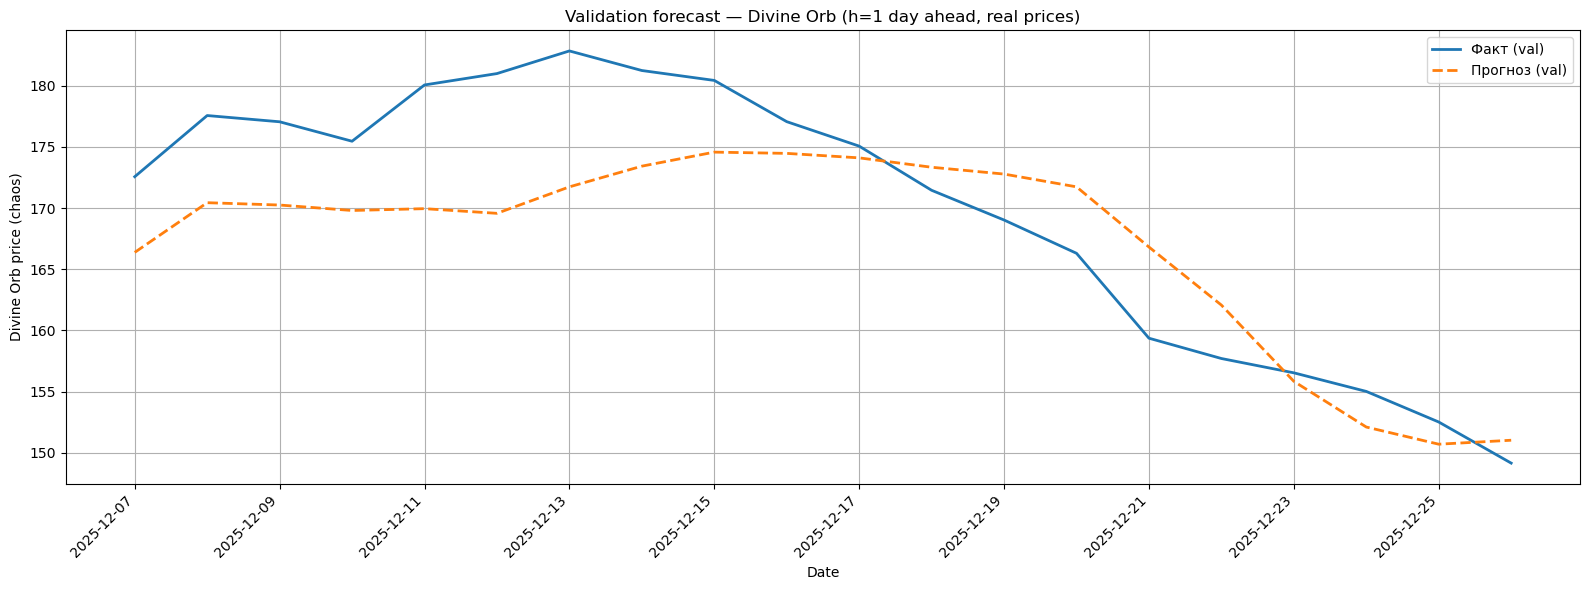

In [45]:
# Предполагаем, что best_model, device, scaler_y_map,
# X_val_tensor, y_val_tensor, league_ids_val, dates_val
# уже определены из предыдущих шагов.

best_model.eval() # Переводим модель в режим оценки

with torch.no_grad():
    # 1. Делаем предсказания на валидационном наборе
    y_val_pred_scaled = best_model(X_val_tensor.to(device)).cpu().numpy()
    # shape: (VAL_SIZE, MAX_HORIZON)

# Инициализируем массивы для реальных (немасштабированных) значений
y_val_true_real = np.zeros_like(y_val_pred_scaled)
y_val_pred_real = np.zeros_like(y_val_pred_scaled)

# 2. Инверсное масштабирование для валидационных данных
for i in range(len(X_val_tensor)): # Проходим по каждой последовательности в валидационном наборе
    league_id = league_ids_val[i] # Получаем league_id для текущей последовательности
    scaler_y  = scaler_y_map[league_id] # Получаем соответствующий скейлер

    # Факт (истинные значения)
    y_val_true_real[i] = scaler_y.inverse_transform(
        y_val_tensor[i].numpy().reshape(-1, 1)
    ).flatten()

    # Прогноз
    y_val_pred_real[i] = scaler_y.inverse_transform(
        y_val_pred_scaled[i].reshape(-1, 1)
    ).flatten()

import matplotlib.pyplot as plt

h = 0  # 1 день вперёд (индекс 0 соответствует первому дню прогноза)

# 3. Расчет дат для оси X, используя dates_val
# prediction_dates_val - это даты, для которых делаются прогнозы
# dates_val содержит anchor_date (последний день входной последовательности)
# Прогноз для h=0 соответствует дате anchor_date + 1 день
prediction_dates_val = dates_val + pd.to_timedelta(h + 1, unit='D')

plt.figure(figsize=(16, 6)) # Увеличиваем размер для лучшей читаемости дат

plt.plot(
    prediction_dates_val, # Используем даты для оси X
    y_val_true_real[:, h],
    label="Факт (val)",
    linewidth=2
)

plt.plot(
    prediction_dates_val, # Используем даты для оси X
    y_val_pred_real[:, h],
    label="Прогноз (val)",
    linestyle="--",
    linewidth=2
)

plt.title(f"Validation forecast — Divine Orb (h={h+1} day ahead, real prices)") # Обновляем заголовок
plt.xlabel("Date") # Меняем подпись оси X
plt.ylabel("Divine Orb price (chaos)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right') # Поворачиваем метки дат для лучшей читаемости
plt.tight_layout()
plt.show()


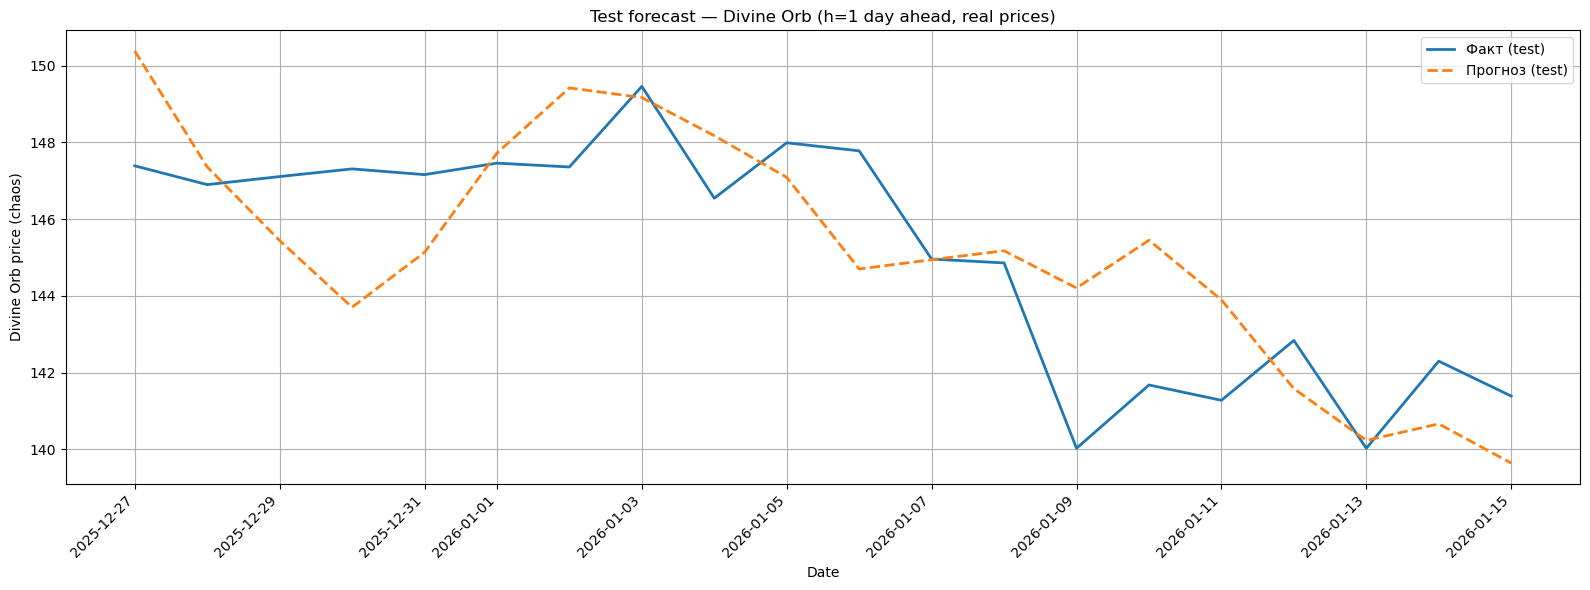

In [71]:
best_model.eval()

with torch.no_grad():
    y_test_pred_scaled = best_model(X_test_tensor.to(device)).cpu().numpy()
    # shape: (N_TEST, MAX_HORIZON)

# test_global_indices больше не нужен для определения scaler_y,
# так как league_ids_test уже содержит нужные league_id для каждого элемента в X_test_tensor
# и y_test_tensor.

y_test_true_real = np.zeros_like(y_test_pred_scaled)
y_test_pred_real = np.zeros_like(y_test_pred_scaled)

# Обратите внимание: i теперь просто индекс в тестовом наборе
for i in range(len(X_test_tensor)): # или len(y_test_pred_scaled)
    league_id = league_ids_test[i] # Используем league_ids_test, который соответствует X_test_tensor
    scaler_y  = scaler_y_map[league_id]

    # факт
    y_test_true_real[i] = scaler_y.inverse_transform(
        y_test_tensor[i].numpy().reshape(-1, 1)
    ).flatten()

    # прогноз
    y_test_pred_real[i] = scaler_y.inverse_transform(
        y_test_pred_scaled[i].reshape(-1, 1)
    ).flatten()



h = 0  # 1 день вперёд. h=0 соответствует первому дню прогноза, h=1 второму и т.д.

# --- НОВЫЙ КОД: Расчет дат для оси X ---
# prediction_dates - это даты, для которых делаются прогнозы
# dates_test содержит anchor_date (последний день входной последовательности)
# Прогноз для h=0 соответствует дате anchor_date + 1 день
# Прогноз для h=1 соответствует дате anchor_date + 2 дня
# ...
# Прогноз для h=k соответствует дате anchor_date + (k + 1) дней
prediction_dates = dates_test + pd.to_timedelta(h + 1, unit='D')
# --- КОНЕЦ НОВОГО КОДА ---

plt.figure(figsize=(16, 6)) # Увеличим размер для лучшей читаемости дат

plt.plot(
    prediction_dates, # Используем даты для оси X
    y_test_true_real[:, h],
    label="Факт (test)",
    linewidth=2
)

plt.plot(
    prediction_dates, # Используем даты для оси X
    y_test_pred_real[:, h],
    label="Прогноз (test)",
    linestyle="--",
    linewidth=2
)

plt.title(f"Test forecast — Divine Orb (h={h+1} day ahead, real prices)") # Обновляем заголовок
plt.xlabel("Date") # Меняем подпись оси X
plt.ylabel("Divine Orb price (chaos)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right') # Поворачиваем метки дат для лучшей читаемости
plt.tight_layout()
plt.show()


In [51]:
X_full_train = torch.cat([X_train_tensor, X_val_tensor], dim=0)
y_full_train = torch.cat([y_train_tensor, y_val_tensor], dim=0)

full_train_loader = DataLoader(
    TensorDataset(X_full_train, y_full_train),
    batch_size=64,
    shuffle=False  # временные ряды — shuffle=False
)

model_final = poe_GRU(
    input_size = X_train_tensor.shape[2],
    output_size = MAX_HORIZON,
    hidden_size = best_params["hidden_size"],
    num_layers = best_params["num_layers"],
    dropout = best_params["dropout"],
    bidirectional = best_params["bidirectional"]   # ← верно!
).to(device)


# Оптимизатор с использованием AdamW и параметров из Optuna
optimizer = torch.optim.Adam(
    model_final.parameters(),
    lr = best_params["lr"]
)


# Используем MSE + MAE loss, как в коде Optuna
criterion = WeightedMultiHorizonLoss(
    alpha=best_params['loss_alpha'],  # Используем параметр alpha, подобранный через Optuna
    horizon_weights=horizon_weights,  # Теперь передаем правильно рассчитанные веса горизонтов
    scale_by_horizon_std=True,        # Фиксируем как True, чтобы вес горизонта нормализовался по std
    peak_boost=True,                  # Усиление пиков также включаем
    boost_factor=best_params['boost_factor']+1 # Используем подобранный boost_factor
)


history_all = train_full_model(
    model_final,
    full_train_loader,
    optimizer,
    criterion,
    device,
    epochs=1000,
    warmup_epochs=100,  # Оптимальные значения для warmup
    patience=100,       # Уменьшаем patience по твоим рекомендациям
    print_every=100
)



C:\Users\danil\AppData\Local\Temp\ipykernel_4772\1997787565.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.horizon_weights = None if horizon_weights is None else torch.tensor(horizon_weights, dtype=torch.float32)
Training (full):   0%|                       | 2/1000 [00:00<01:18, 12.76it/s, train=3.05134, lr=0.000049, ETA=00:01:18]


Epoch 0001 | Train: 3.248232 | LR: 0.00001640 | ETA: 00:01:24


Training (full):  10%|██▏                  | 102/1000 [00:07<01:12, 12.37it/s, train=0.51467, lr=0.001640, ETA=00:01:09]


Epoch 0100 | Train: 0.505992 | LR: 0.00164007 | ETA: 00:01:09


Training (full):  20%|████▏                | 202/1000 [00:15<01:04, 12.40it/s, train=0.39249, lr=0.001589, ETA=00:01:02]


Epoch 0200 | Train: 0.333490 | LR: 0.00159062 | ETA: 00:01:02


Training (full):  30%|██████▎              | 302/1000 [00:23<00:52, 13.26it/s, train=0.27218, lr=0.001445, ETA=00:00:55]


Epoch 0300 | Train: 0.266155 | LR: 0.00144822 | ETA: 00:00:55


Training (full):  40%|████████▍            | 402/1000 [00:31<00:43, 13.82it/s, train=0.21131, lr=0.001225, ETA=00:00:47]


Epoch 0400 | Train: 0.245524 | LR: 0.00123006 | ETA: 00:00:47


Training (full):  50%|██████████▌          | 502/1000 [00:39<00:40, 12.21it/s, train=0.17238, lr=0.000957, ETA=00:00:39]


Epoch 0500 | Train: 0.156264 | LR: 0.00096244 | ETA: 00:00:39


Training (full):  60%|████████████▋        | 602/1000 [00:47<00:29, 13.67it/s, train=0.14508, lr=0.000672, ETA=00:00:31]


Epoch 0600 | Train: 0.158058 | LR: 0.00067764 | ETA: 00:00:31


Training (full):  70%|██████████████▋      | 702/1000 [00:54<00:21, 13.60it/s, train=0.13665, lr=0.000405, ETA=00:00:23]


Epoch 0700 | Train: 0.126604 | LR: 0.00041002 | ETA: 00:00:23


Training (full):  80%|████████████████▊    | 802/1000 [01:02<00:14, 13.64it/s, train=0.12002, lr=0.000186, ETA=00:00:15]


Epoch 0800 | Train: 0.117067 | LR: 0.00019185 | ETA: 00:00:15


Training (full):  90%|██████████████████▉  | 902/1000 [01:09<00:07, 13.03it/s, train=0.11653, lr=0.000048, ETA=00:00:07]


Epoch 0900 | Train: 0.114331 | LR: 0.00004945 | ETA: 00:00:07


Training (full): 100%|████████████████████| 1000/1000 [01:17<00:00, 12.94it/s, train=0.11429, lr=0.000001, ETA=00:00:00]


Epoch 1000 | Train: 0.114294 | LR: 0.00000100 | ETA: 00:00:00


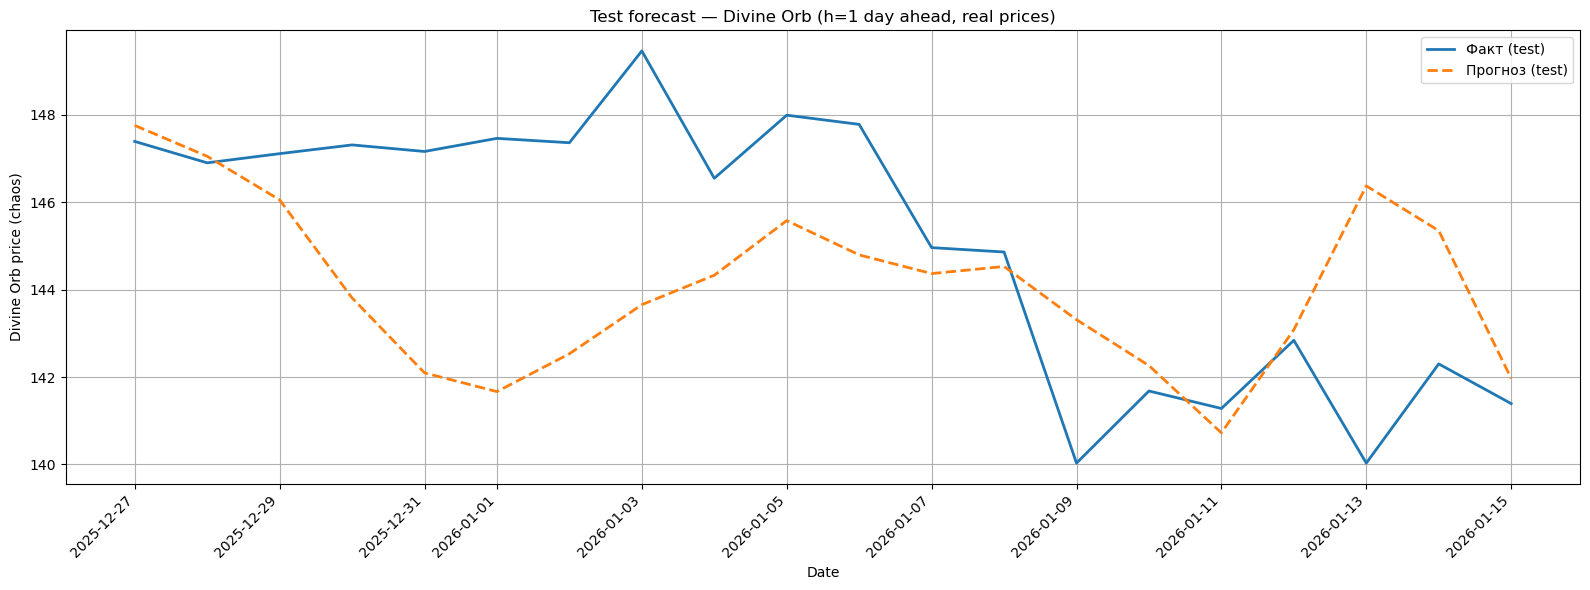

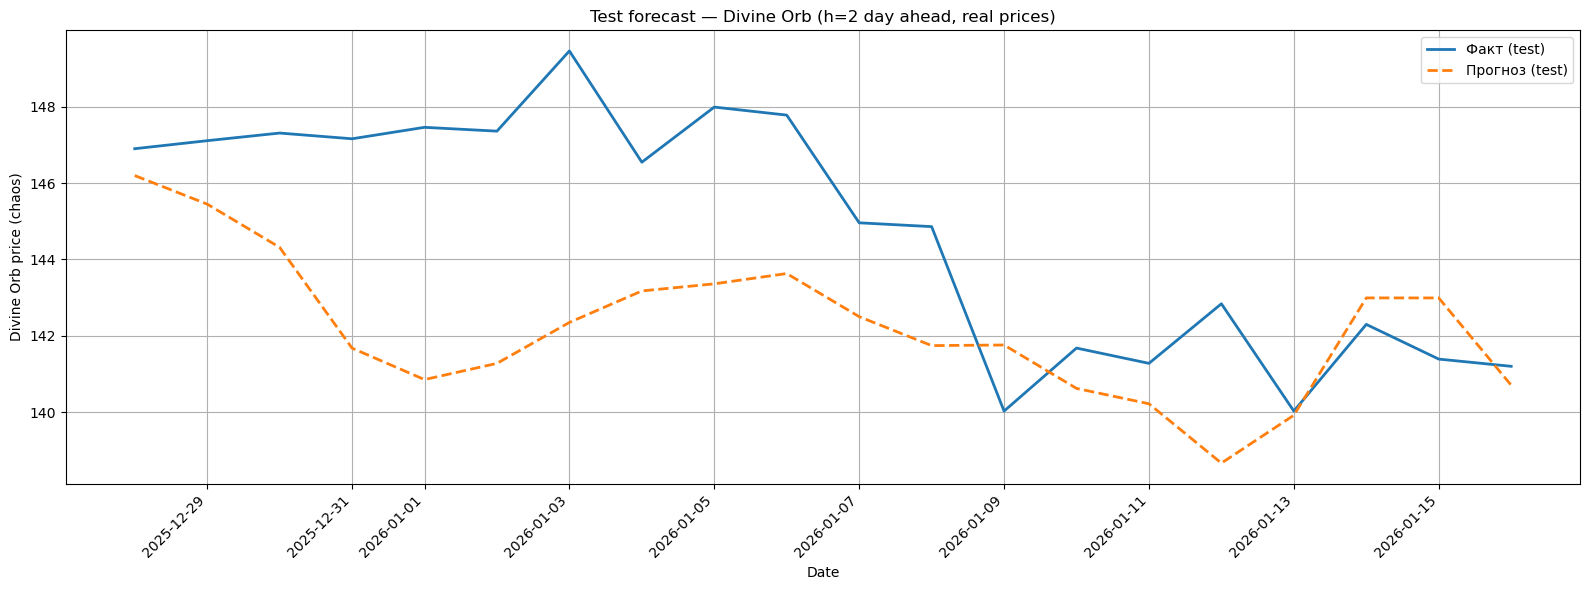

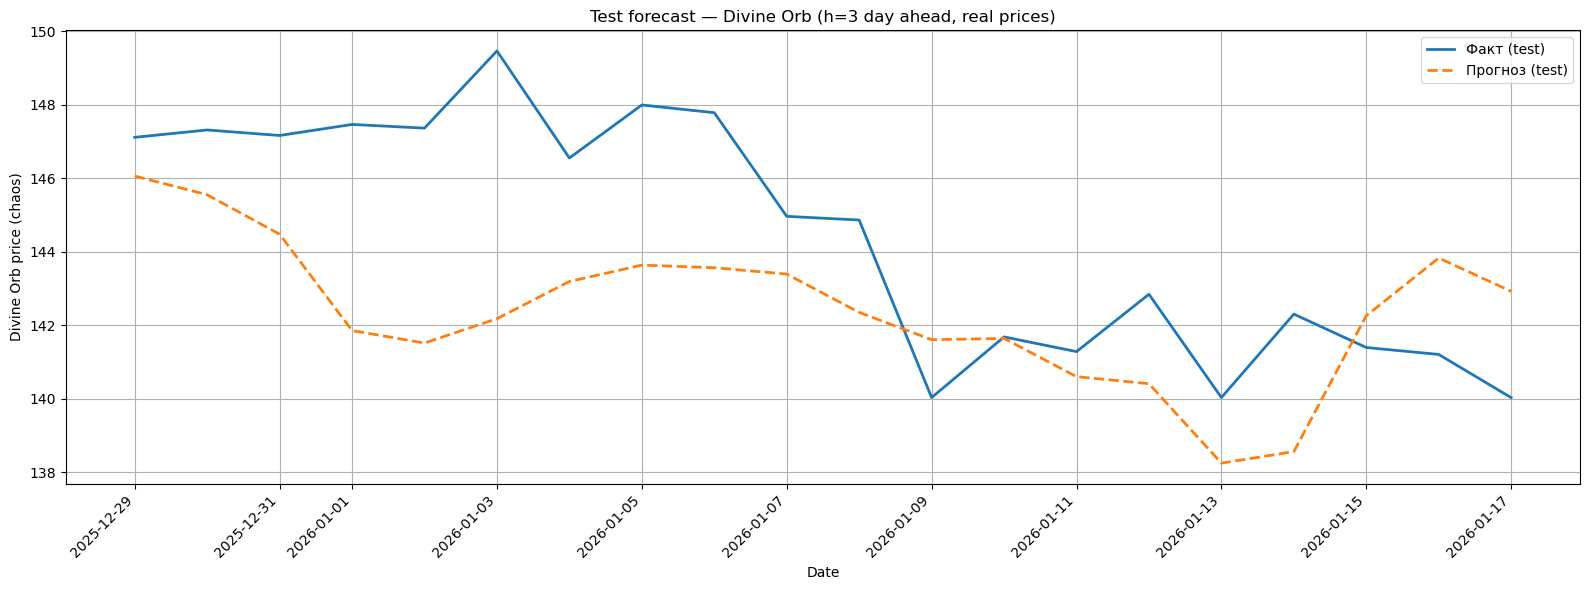

In [56]:


# Предполагаем, что model_final, device, scaler_y_map,
# X_test_tensor, y_test_tensor, league_ids_test, dates_test, MAX_HORIZON
# уже определены из предыдущих шагов.

# --- Начало подготовки данных (как у вас было) ---
model_final.eval()

with torch.no_grad():
    y_test_pred_scaled = model_final(X_test_tensor.to(device)).cpu().numpy()
    # shape: (N_TEST, MAX_HORIZON)

y_test_true_real = np.zeros_like(y_test_pred_scaled)
y_test_pred_real = np.zeros_like(y_test_pred_scaled)

for i in range(len(X_test_tensor)):
    league_id = league_ids_test[i]
    scaler_y  = scaler_y_map[league_id]

    y_test_true_real[i] = scaler_y.inverse_transform(
        y_test_tensor[i].numpy().reshape(-1, 1)
    ).flatten()

    y_test_pred_real[i] = scaler_y.inverse_transform(
        y_test_pred_scaled[i].reshape(-1, 1)
    ).flatten()
# --- Конец подготовки данных ---


# --- НОВЫЙ КОД: Цикл по всем горизонтам MAX_HORIZON ---
for h in range(MAX_HORIZON): # h от 0 до MAX_HORIZON-1
    # Расчет дат для оси X для текущего горизонта h
    prediction_dates = dates_test + pd.to_timedelta(h + 1, unit='D')

    plt.figure(figsize=(16, 6))

    plt.plot(
        prediction_dates,
        y_test_true_real[:, h],
        label="Факт (test)",
        linewidth=2
    )

    plt.plot(
        prediction_dates,
        y_test_pred_real[:, h],
        label="Прогноз (test)",
        linestyle="--",
        linewidth=2
    )

    plt.title(f"Test forecast — Divine Orb (h={h+1} day ahead, real prices)")
    plt.xlabel("Date")
    plt.ylabel("Divine Orb price (chaos)")
    plt.grid(True)
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
# --- КОНЕЦ НОВОГО КОДА ---


In [59]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- Функции для расчета метрик ---
def calculate_mae(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def calculate_mape(y_true, y_pred, epsilon=1e-8):
    """
    Calculates Mean Absolute Percentage Error (MAPE).
    Handles potential division by zero by filtering out true values close to zero.
    """
    # Создаем маску для исключения значений y_true, близких к нулю,
    # чтобы избежать деления на ноль и аномально больших MAPE.
    # Для цен валют обычно значения не бывают равны нулю, но лучше перестраховаться.
    non_zero_mask = np.abs(y_true) > epsilon
    if not np.any(non_zero_mask):
        return np.nan # Если все y_true нули, MAPE не определен

    y_true_filtered = y_true[non_zero_mask]
    y_pred_filtered = y_pred[non_zero_mask]

    return np.mean(np.abs((y_true_filtered - y_pred_filtered) / y_true_filtered)) * 100

# --- Подготовка данных (как в вашем коде) ---
# Предполагается, что model_final, device, scaler_y_map,
# X_test_tensor, y_test_tensor, league_ids_test, dates_test, MAX_HORIZON
# уже определены и заполнены.



# --- Расчет метрик по каждому горизонту ---
metrics_results = []

for h in range(MAX_HORIZON):
    # Извлекаем истинные и предсказанные значения для текущего горизонта
    y_true_h = y_test_true_real[:, h]
    y_pred_h = y_test_pred_real[:, h]

    # Рассчитываем метрики
    mae_h = calculate_mae(y_true_h, y_pred_h)
    rmse_h = calculate_rmse(y_true_h, y_pred_h)
    mape_h = calculate_mape(y_true_h, y_pred_h)

    metrics_results.append({
        'Horizon (days ahead)': h + 1, # Горизонт в днях (1-based index)
        'MAE': mae_h,
        'RMSE': rmse_h,
        'MAPE_%': mape_h
    })

# Преобразуем результаты в DataFrame для удобства
metrics_df = pd.DataFrame(metrics_results)

print("--- Метрики по каждому горизонту прогноза ---")
print(metrics_df.round(3)) # Округляем для лучшей читаемости

print("\n--- Средние метрики по всем горизонтам прогноза ---")
# Усредняем только числовые колонки, исключая 'Horizon (days ahead)'
average_metrics = metrics_df.drop(columns=['Horizon (days ahead)']).mean()
print(average_metrics.round(3))




--- Метрики по каждому горизонту прогноза ---
   Horizon (days ahead)    MAE   RMSE  MAPE_%
0                     1  2.487  3.250   1.709
1                     2  2.963  3.640   2.025
2                     3  2.845  3.384   1.953

--- Средние метрики по всем горизонтам прогноза ---
MAE       2.765
RMSE      3.425
MAPE_%    1.896
dtype: float64


In [69]:
X_full = torch.cat([X_train_tensor, X_val_tensor, X_test_tensor], dim=0).to(device)
y_full = torch.cat([y_train_tensor, y_val_tensor, y_test_tensor], dim=0).to(device)

full_train_loader = DataLoader(
    TensorDataset(X_full, y_full),
    batch_size=64,
    shuffle=False  # временные ряды — shuffle=False
)

model_full = poe_GRU(
    input_size = X_train_tensor.shape[2],
    output_size = MAX_HORIZON,
    hidden_size = best_params["hidden_size"],
    num_layers = best_params["num_layers"],
    dropout = best_params["dropout"],
    bidirectional = best_params["bidirectional"]  
).to(device)


# Оптимизатор с использованием AdamW и параметров из Optuna
optimizer = torch.optim.Adam(
    model_full.parameters(),
    lr = best_params["lr"]
)


# Используем MSE + MAE loss, как в коде Optuna
criterion = WeightedMultiHorizonLoss(
    alpha=best_params['loss_alpha'],  # Используем параметр alpha, подобранный через Optuna
    horizon_weights=horizon_weights,  # Теперь передаем правильно рассчитанные веса горизонтов
    scale_by_horizon_std=True,        # Фиксируем как True, чтобы вес горизонта нормализовался по std
    peak_boost=True,                  # Усиление пиков также включаем
    boost_factor=7 # Используем подобранный boost_factor
)


history_all = train_full_model(
    model_full,
    full_train_loader,
    optimizer,
    criterion,
    device,
    epochs=800,
    warmup_epochs=100,  # Оптимальные значения для warmup
    patience=100,       # Уменьшаем patience по твоим рекомендациям
    print_every=100
)



C:\Users\danil\AppData\Local\Temp\ipykernel_4772\1997787565.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.horizon_weights = None if horizon_weights is None else torch.tensor(horizon_weights, dtype=torch.float32)
Training (full):   0%|                        | 2/800 [00:00<01:14, 10.65it/s, train=4.46397, lr=0.000049, ETA=00:01:12]


Epoch 0001 | Train: 4.698637 | LR: 0.00001640 | ETA: 00:01:13


Training (full):  13%|██▊                   | 102/800 [00:08<00:55, 12.61it/s, train=0.69713, lr=0.001640, ETA=00:00:57]


Epoch 0100 | Train: 0.709320 | LR: 0.00164007 | ETA: 00:00:57


Training (full):  25%|█████▌                | 202/800 [00:16<00:48, 12.30it/s, train=0.49369, lr=0.001556, ETA=00:00:48]


Epoch 0200 | Train: 0.479059 | LR: 0.00155887 | ETA: 00:00:48


Training (full):  38%|████████▎             | 302/800 [00:24<00:39, 12.61it/s, train=0.35022, lr=0.001326, ETA=00:00:40]


Epoch 0300 | Train: 0.373698 | LR: 0.00133132 | ETA: 00:00:40


Training (full):  50%|███████████           | 402/800 [00:32<00:33, 11.94it/s, train=0.30309, lr=0.000995, ETA=00:00:32]


Epoch 0400 | Train: 0.319370 | LR: 0.00100251 | ETA: 00:00:32


Training (full):  63%|█████████████▊        | 502/800 [00:40<00:23, 12.86it/s, train=0.23078, lr=0.000630, ETA=00:00:24]


Epoch 0500 | Train: 0.233877 | LR: 0.00063756 | ETA: 00:00:24


Training (full):  75%|████████████████▌     | 602/800 [00:48<00:15, 13.17it/s, train=0.21023, lr=0.000303, ETA=00:00:15]


Epoch 0600 | Train: 0.198680 | LR: 0.00030875 | ETA: 00:00:16


Training (full):  88%|███████████████████▎  | 702/800 [00:56<00:08, 10.91it/s, train=0.19494, lr=0.000078, ETA=00:00:07]


Epoch 0700 | Train: 0.196486 | LR: 0.00008121 | ETA: 00:00:08


Training (full): 100%|██████████████████████| 800/800 [01:04<00:00, 12.47it/s, train=0.18529, lr=0.000001, ETA=00:00:00]


Epoch 0800 | Train: 0.185290 | LR: 0.00000100 | ETA: 00:00:00


Расчет y_test_true_real и y_test_pred_real...
Расчет завершен.
Anchor Date (последний известный факт): 2026-01-14
Даты исторических данных (весь тестовый период): 2025-12-20 - 2026-01-14
Даты прогноза (MAX_HORIZON=3): 2026-01-15 - 2026-01-17


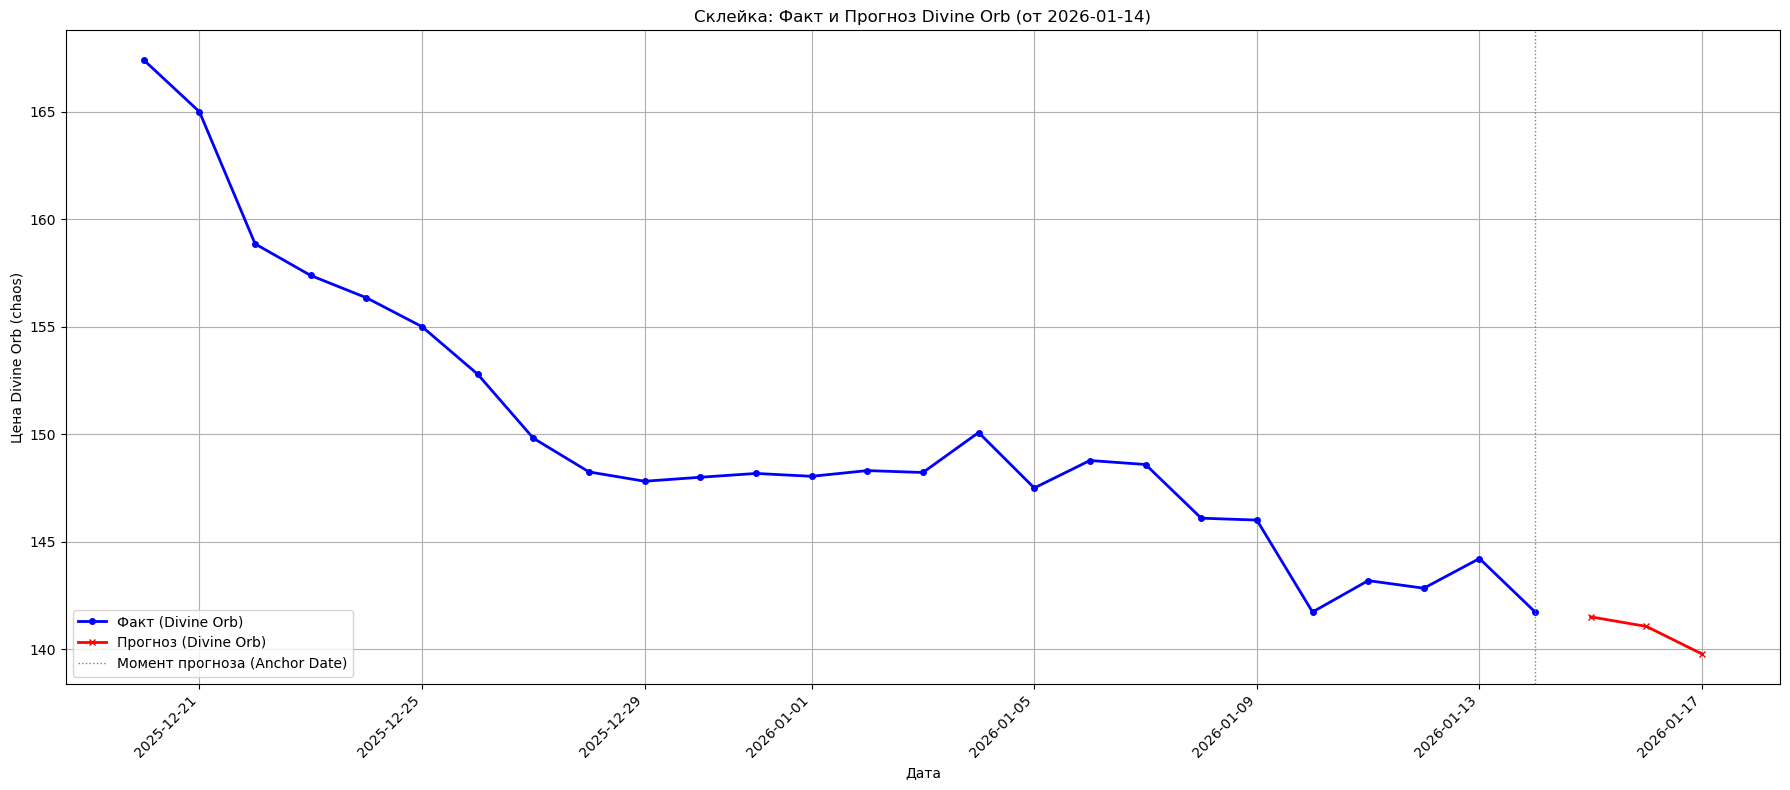

In [89]:
print("Расчет y_test_true_real и y_test_pred_real...")
model_full.eval()
with torch.no_grad():
    y_test_pred_scaled = model_full(X_test_tensor.to(device)).cpu().numpy()

y_test_true_real = np.zeros_like(y_test_pred_scaled)
y_test_pred_real = np.zeros_like(y_test_pred_scaled)

for i in range(len(X_test_tensor)):
    league_id = league_ids_test[i]
    scaler_y  = scaler_y_map[league_id]

    y_test_true_real[i] = scaler_y.inverse_transform(
        y_test_tensor[i].numpy().reshape(-1, 1)
    ).flatten()

    y_test_pred_real[i] = scaler_y.inverse_transform(
        y_test_pred_scaled[i].reshape(-1, 1)
    ).flatten()
print("Расчет завершен.")


sequence_idx_to_plot = len(X_test_tensor) - 1

# anchor_date - это ПОСЛЕДНИЙ ДЕНЬ ВХОДНОЙ ИСТОРИЧЕСКОЙ ПОСЛЕДОВАТЕЛЬНОСТИ.
# Именно от него модель начинает прогнозировать.
final_anchor_date = dates_test[sequence_idx_to_plot]
league_id_for_final_prediction = league_ids_test[sequence_idx_to_plot]
scaler_y_for_final_prediction = scaler_y_map[league_id_for_final_prediction]
print(f"Anchor Date (последний известный факт): {final_anchor_date.strftime('%Y-%m-%d')}")


# --- 1. Сбор ВСЕХ исторических данных из X_test_tensor до final_anchor_date ---
# Индекс колонки для 'Divine Orb_lag_1' в вашем наборе признаков.
divine_orb_lag1_feature_idx = 4

# Словарь для хранения уникальных дат и их значений.
# Это позволит избежать дубликатов и упорядочить данные.
all_historical_data_points = {}

# Итерируем по ВСЕМ последовательностям в X_test_tensor
for i in range(len(X_test_tensor)):
    current_anchor_date = dates_test[i]
    current_league_id = league_ids_test[i]
    current_scaler_y = scaler_y_map[current_league_id]

    current_X_seq_scaled = X_test_tensor[i].cpu().numpy()
    current_historical_divine_orb_scaled = current_X_seq_scaled[:, divine_orb_lag1_feature_idx]

    # Инверсное преобразование для текущей последовательности
    current_historical_divine_orb_real = current_scaler_y.inverse_transform(
        current_historical_divine_orb_scaled.reshape(-1, 1)
    ).flatten()

    # Генерируем даты для текущей исторической последовательности
    current_history_dates_seq = pd.date_range(end=current_anchor_date, periods=SEQ_LEN, freq='D')

    # Добавляем данные в словарь. Если дата уже есть, она будет перезаписана,
    # что нормально, так как это одни и те же фактические значения.
    for date, value in zip(current_history_dates_seq, current_historical_divine_orb_real):
        all_historical_data_points[date] = value

# Сортируем собранные исторические данные по дате
sorted_history_dates = sorted(all_historical_data_points.keys())
sorted_history_values = [all_historical_data_points[date] for date in sorted_history_dates]

# Обрезаем историю, чтобы она заканчивалась ровно на final_anchor_date
# (если вдруг в all_historical_data_points оказались даты после final_anchor_date,
# что маловероятно при правильной генерации dates_test, но для надежности)
plot_history_dates = [d for d in sorted_history_dates if d <= final_anchor_date]
plot_history_values = [all_historical_data_points[d] for d in plot_history_dates]

print(f"Даты исторических данных (весь тестовый период): {plot_history_dates[0].strftime('%Y-%m-%d')} - {plot_history_dates[-1].strftime('%Y-%m-%d')}")


# --- 2. Предсказанные данные для последней последовательности ---
future_pred_real = y_test_pred_real[sequence_idx_to_plot, :]

# Даты для прогноза: начинаются со СЛЕДУЮЩЕГО дня после final_anchor_date
# и продолжаются на MAX_HORIZON дней.
forecast_dates = pd.date_range(start=final_anchor_date + pd.Timedelta(days=1), periods=MAX_HORIZON, freq='D')
print(f"Даты прогноза (MAX_HORIZON={MAX_HORIZON}): {forecast_dates.min().strftime('%Y-%m-%d')} - {forecast_dates.max().strftime('%Y-%m-%d')}")


# --- Построение графика ---
plt.figure(figsize=(18, 8))

# 1. Отображаем ВСЕ исторические фактические значения (Факт)
# Эта линия заканчивается ровно на final_anchor_date.
plt.plot(
    plot_history_dates,
    plot_history_values,
    label="Факт (Divine Orb)",
    color='blue',
    linewidth=2,
    marker='o', markersize=4
)

# 2. Отображаем предсказанные значения (Прогноз)
# Эта линия начинается со следующего дня после final_anchor_date.
plt.plot(
    forecast_dates,
    future_pred_real,
    label="Прогноз (Divine Orb)",
    color='red',
    linewidth=2,
    linestyle='-',
    marker='x', markersize=4
)

# Добавляем вертикальную линию в final_anchor_date, чтобы явно показать момент,
# где заканчивается факт и начинается прогноз.
plt.axvline(final_anchor_date, color='gray', linestyle=':', linewidth=1, label="Момент прогноза (Anchor Date)")

# Заголовок графика динамически отображает final_anchor_date
plt.title(f"Склейка: Факт и Прогноз Divine Orb (от {final_anchor_date.strftime('%Y-%m-%d')})")
plt.xlabel("Дата")
plt.ylabel("Цена Divine Orb (chaos)")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()